# Contents:
* Import module and set basic items
* View Data 
* observe columns
    * (1) Label:Y1 is imbalanced: Y: 2% ; N:98%
    
    * (2)One Feature: GENDER (性別)
    
    * (3)One Feature: OCCUPATION_CLASS_CD(客戶職業類別(各類別)對核保風險程度)
    
    * (4)Two Features : OCCUPATION_CLASS_CD(客戶職業類別(各類別)對核保風險程度) & GENDER (性別)
    
    * (5)Two features: GENDER (性別) & BMI(神秘轉換)(Involve one feature:BMI)
    
        * (5-1)BMI遺失值觀察
        
    * (6)Feature engineering: if_bmi_in (BMI是否於[0.0, 0.2) )
    
    * (7)Feature engineering: 基本項目遺失值、生調表或健康報告書遺失值、前三者綜合遺失值
    
    * (8)One feature:EDUCATION_CD(教育程度/學歷)
    
        * (8-1)EDUCATION_CD遺失值觀察
        
    * (9)Multi-features: EDUCATION_CD(教育程度/學歷)、AGE(年齡(年)(級距) )、3個基本資料遺失值特徵
    
        * (9-1)AGE:年齡(年)(級距)
        
            * (9-1-1)延伸9-1，觀察AGE vs ANNUAL_INCOME_AMT (年收入 (神秘轉換&歸一化) )
            
            * (9-1-2)延伸9-1-1，低年齡者Y值在保戶二代下的比例 & 延伸9-1，AGE vs IF_2ND_GEN_IND (是否為保戶二代(Y/N))
            
            * (9-1-3)略
            
        * (9-2)two features:EDUCATION_CD & AGE
        
        * (9-3) 三個基本資料遺失值特徵 & AGE
        
        * (9-4)三個基本資料遺失值特徵 & EDUCATION_CD(教育程度)
        
    * (10)Two Features:CHANNEL_A_POL_CNT(透過A通路投保新契約件數) & B
    
    * (11)One feature:MARRIAGE_CD(婚姻狀況)
    
    * (12) Three Features: MARRIAGE_CD & AGE & EDUCATION_CD
    
    * (13)ILL_ACCELERATION_AMT 當年度保障_重大疾病提前給付(神秘轉換&歸一化)
          & ILL_ADDITIONAL_AMT 當年度保障_重大疾病額外給付 (神秘轉換&歸一化)
          
    * (14)與ABC通路相關欄位
    
    * (15)相關性矩陣
    
    * (16)其他
        
        * (16-1)APC_1ST_AGE, APC_1ST_YEARDIF, REBUY_TIMES_CNT, RFM_M_LEVEL, TERMINATION_RATE NaN推測
    
    * (17)連續數值(或數值資料)觀察
    
* Clean missing value test based on EDA

    * (1)BMI clean
    * (2)GENDER clean
    
    
    
          
    
    

        
          
        
        
        
     
    

# Import module and set basic items

In [10]:
'''import module'''

# basic tool
import os
from functools import reduce

# data process and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# style and text
from matplotlib.font_manager import FontProperties

%matplotlib inline

In [11]:
# working dir
working_path = r"D:\mypython_d\Cathay_Big_data_competition_2019"
os.chdir(working_path)

In [12]:
# set figure style
sns.set_style("whitegrid")
# set text
font = FontProperties(fname=r"c:\windows\Fonts\msjh.ttc")
font_heavy = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc")
font_big = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc", size= "x-large")
font_kibig = FontProperties(fname=r"c:\windows\Fonts\msjhbd.ttc", size= "large")

In [13]:
# use big5 to encoding
train = pd.read_csv("train.csv", encoding="Big5", low_memory=False)
test = pd.read_csv("test.csv", encoding="Big5", low_memory=False)

In [14]:
# show countplot, and rate of hue
def count_and_percent(col, data, hue, size=None):
    
    plt.figure(figsize=size)
    sns.countplot(x=col, data=data, palette="viridis")
    # change font
    plt.xticks(fontproperties=font_heavy)
    
    plt.figure(figsize=size)
    sns.countplot(x=col, data=data, hue=hue, palette="viridis")
    
    # change font
    plt.xticks(fontproperties=font_heavy)
    plt.legend(prop=font_heavy)
    
    plt.show()
    for cat in data[col].unique():
        show_percent(cat, col, data, hue)
    
def show_percent(category, col, data, hue):
    print("-------------------------------")
    print(str(category) + ":")
    if  repr(category) != "nan":
        value_info = data[data[col] == category][hue].value_counts()
        print(value_info)
        for hue_cat in sorted(value_info.keys()):
            print(str(hue_cat) + "(%):", (value_info[hue_cat]/value_info.sum()) * 100 )
    else:
        value_info = data[data[col].isnull()][hue].value_counts()
        print(value_info)
        for hue_cat in sorted(value_info.keys()):
            print(str(hue_cat) + "(%):", (value_info[hue_cat]/value_info.sum()) * 100 )

In [6]:
# build subset for feature engineering
train_v1 = pd.DataFrame(train[["GENDER", "OCCUPATION_CLASS_CD", "BMI", "Y1"]], 
                        columns=["GENDER", "OCCUPATION_CLASS_CD", "BMI", "Y1"])
train_v1["MARRIAGE_CD"] = train["MARRIAGE_CD"]

In [7]:
train_v1["IF_2ND_GEN_IND"] = train["IF_2ND_GEN_IND"]

In [8]:
# change N Y to 0 1(Y1)
def trans(cols):
    if cols == "Y":
        return 1
    else:
        return 0
train_v1["EDUCATION_CD"] = train["EDUCATION_CD"]
train_v1["AGE"] = train["AGE"]
train_v1["Y"] = train["Y1"].apply(trans) 

In [9]:
# let nan as one category(train_v1)
train_v1["EDUCATION_CD"].fillna(0, inplace=True)

In [10]:
def agg_fun1(lst):
    
    count = 0
    for ele in lst:
        if ele == 1:
            count = count + 1
    
    return (count/len(lst))
        

# View Data 

In [7]:
print(train.info(max_cols=150))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 132 columns):
CUS_ID                       100000 non-null int64
GENDER                       99317 non-null object
AGE                          100000 non-null object
CHARGE_CITY_CD               100000 non-null object
CONTACT_CITY_CD              100000 non-null object
EDUCATION_CD                 79438 non-null float64
MARRIAGE_CD                  92049 non-null float64
LAST_A_CCONTACT_DT           100000 non-null object
L1YR_A_ISSUE_CNT             100000 non-null int64
LAST_A_ISSUE_DT              100000 non-null object
L1YR_B_ISSUE_CNT             100000 non-null int64
LAST_B_ISSUE_DT              100000 non-null object
CHANNEL_A_POL_CNT            100000 non-null int64
CHANNEL_B_POL_CNT            100000 non-null int64
OCCUPATION_CLASS_CD          96040 non-null float64
APC_CNT                      100000 non-null int64
INSD_CNT                     100000 non-null int64
APC_1ST_AGE  

In [9]:
train.head()

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
0,3418,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.000174,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,4302,M,低,A1,A1,NaN,NaN,Y,0,N,...,0.008724,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,5545,M,低,A1,A1,1.0,0.0,Y,1,Y,...,0.005359,A,Y,N,N,N,N,N,N,N
3,7207,M,低,A1,A1,NaN,0.0,Y,0,N,...,0.000000,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,7213,M,低,A1,A1,1.0,0.0,N,0,N,...,0.000603,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [32]:
train.describe()

,CUS_ID,EDUCATION_CD,MARRIAGE_CD,L1YR_A_ISSUE_CNT,L1YR_B_ISSUE_CNT,CHANNEL_A_POL_CNT,CHANNEL_B_POL_CNT,OCCUPATION_CLASS_CD,APC_CNT,INSD_CNT,...,OUTPATIENT_SURGERY_AMT,INPATIENT_SURGERY_AMT,PAY_LIMIT_MED_MISC_AMT,FIRST_CANCER_AMT,ILL_ACCELERATION_AMT,ILL_ADDITIONAL_AMT,LONG_TERM_CARE_AMT,MONTHLY_CARE_AMT,LIFE_INSD_CNT,L1YR_GROSS_PRE_AMT
count,1.000000e+05,79438.000000,92049.000000,100000.000000,100000.000000,100000.000000,100000.000000,96040.000000,100000.000000,100000.000000,...,72460.000000,72460.000000,72460.000000,72460.000000,72460.000000,72460.000000,72460.000000,72460.000000,100000.000000,100000.000000
mean,1.267299e+06,2.169075,0.315289,0.118170,0.003330,1.627730,0.031080,1.304967,0.681070,0.283620,...,0.089922,0.058821,0.094473,0.014284,0.004284,0.002229,0.002394,0.018912,0.031473,0.000525
std,7.382534e+05,0.929452,0.489678,0.561755,0.062442,3.365798,0.262326,0.711769,0.614847,0.747238,...,0.101751,0.078278,0.166933,0.033439,0.014163,0.009714,0.020305,0.040821,0.034269,0.003117
min,1.200000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.275398e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000
50%,1.261358e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.063492,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000
75%,1.903561e+06,3.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,...,0.142857,0.103030,0.312500,0.018868,0.000000,0.000000,0.000000,0.025773,0.046875,0.000265
max,2.551470e+06,4.000000,2.000000,22.000000,4.000000,97.000000,17.000000,6.000000,4.000000,19.000000,...,0.952381,0.824242,1.000000,0.734591,0.666667,0.300000,0.809524,0.859107,0.921875,0.327815


* Existing several columns has null value

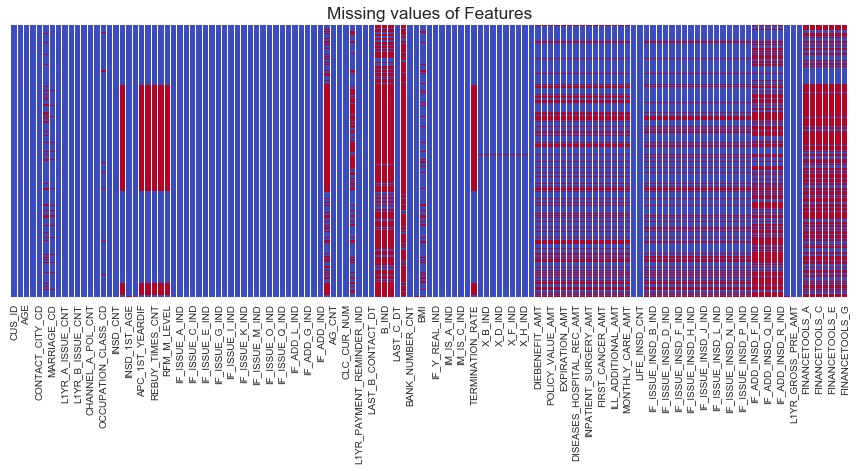

In [33]:
# Nan figure(red:Nan) of train
plt.figure(figsize=[15, 5])
plt.title("Missing values of Features", fontdict={"fontsize":"xx-large"})
sns.heatmap(train.drop("Y1", axis=1).isnull(), yticklabels=False, cbar=False, cmap="coolwarm")

# observe columns
欄位挑選:
* 選定幾個有趣的欄位單獨觀察分配、分佈、現象
* 根據實際上可能會有關係的欄位來觀察發生的現象
* 根據上述觀察出的現象，延伸到其他欄位，以發掘新現象，以及驗證已知現象
* 盡量以多維度方式觀察交互作用後產生的新現象、特殊現象

### (1)Label:Y1 is imbalanced: Y: 2% ; N:98%

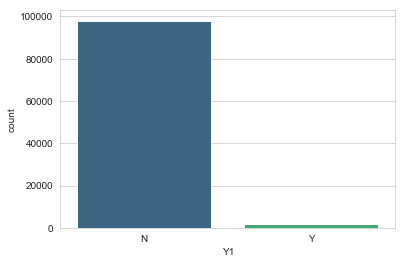

-------------------------------
N    98000
Y     2000
Name: Y1, dtype: int64
Y%: 2.0


In [175]:
sns.countplot(x="Y1", data=train, palette="viridis")
plt.show()
print("-------------------------------")
print(train["Y1"].value_counts())
print("Y%:", (train["Y1"].value_counts()["Y"]/(train["Y1"].value_counts()["Y"] + train["Y1"].value_counts()["N"])) * 100 )

### (2)One Feature: GENDER (性別):

* There are 683 missing value in this column.
* F numbers larger than M numbers.
* The percentages of F/M don't have significient difference(By Observation).
* Note: all missing value are NaN in this dataset. However,maybe some are actually None.(still be recorded as NaN)

In [177]:
# compute numbers of missing value
abs(train["GENDER"].value_counts().sum() - 100000)

683

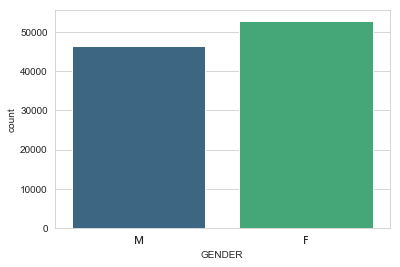

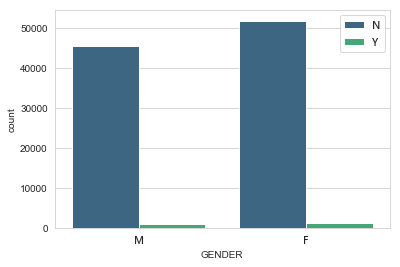

-------------------------------
M:
N    45529
Y      844
Name: Y1, dtype: int64
N(%): 98.17997541672956
Y(%): 1.8200245832704374
-------------------------------
F:
N    51807
Y     1137
Name: Y1, dtype: int64
N(%): 97.85244786944696
Y(%): 2.1475521305530374
-------------------------------
nan:
N    664
Y     19
Name: Y1, dtype: int64
N(%): 97.2181551976574
Y(%): 2.781844802342606


In [16]:
# countplot and percentage based on Y1(Y/N)
count_and_percent("GENDER", data=train, hue="Y1")

### (3)One Feature: OCCUPATION_CLASS_CD(客戶職業類別(各類別)對核保風險程度):
* There are 3960 missing value in this column.
* The percentage of Y of category 0 is extremely small(0.45%)(Numbers of 0: 871)(few), and that of Nan is large(7.2%)(But the numbers of Nan is not big(3960).
* 0, 5, 6 :極少數類(比例參考價值有限)；3,4, nan:較少數類 (視nan為一類的話)
* Note: 不管有無保意外險，只要是要保人或被保險人就要填寫基本資料，受益人不用。如果只是單純諮詢，有些業務員或銀行人員會特別紀錄。


In [20]:
# NaN in OCCUPATION_CLASS_CD
print(abs(train["OCCUPATION_CLASS_CD"].value_counts().sum() - 100000))

3960


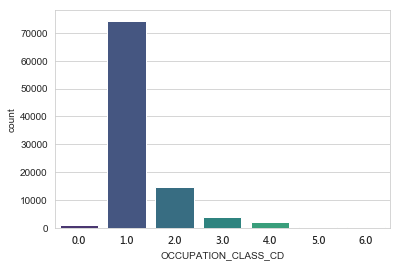

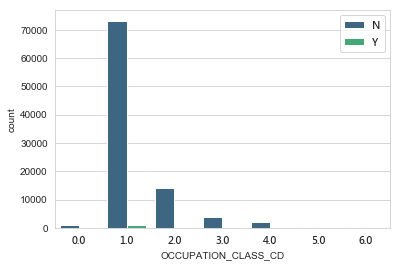

-------------------------------
1.0:
N    73210
Y     1162
Name: Y1, dtype: int64
N(%): 98.43758403700318
Y(%): 1.5624159629968266
-------------------------------
nan:
N    3674
Y     286
Name: Y1, dtype: int64
N(%): 92.77777777777779
Y(%): 7.222222222222221
-------------------------------
2.0:
N    14121
Y      396
Name: Y1, dtype: int64
N(%): 97.2721636701798
Y(%): 2.727836329820211
-------------------------------
3.0:
N    3728
Y      99
Name: Y1, dtype: int64
N(%): 97.41311732427489
Y(%): 2.586882675725111
-------------------------------
5.0:
N    220
Y      6
Name: Y1, dtype: int64
N(%): 97.34513274336283
Y(%): 2.6548672566371683
-------------------------------
4.0:
N    1985
Y      40
Name: Y1, dtype: int64
N(%): 98.0246913580247
Y(%): 1.9753086419753085
-------------------------------
6.0:
N    195
Y      7
Name: Y1, dtype: int64
N(%): 96.53465346534654
Y(%): 3.4653465346534658
-------------------------------
0.0:
N    867
Y      4
Name: Y1, dtype: int64
N(%): 99.54075774971297


In [22]:
# 職業類別是0的人Y的比例特別少;NAN最大
count_and_percent("OCCUPATION_CLASS_CD", train, "Y1")

### (4)Two Features : OCCUPATION_CLASS_CD(客戶職業類別(各類別)對核保風險程度) & GENDER (性別):
* All categories except 1 present that Percentage of Y of M > F (Only 1 F > M). We can consider use OCCUPATION_CLASS_CD column to predict the missing values of GENDER column. (Ex. If 0: "F", else: "M")
* In reality, As 1->6->0, the risk of that kinda jobs increases, and at least in Taiwan females seldom do this kinda job.
* Numbers that both features are NaN: 25 row


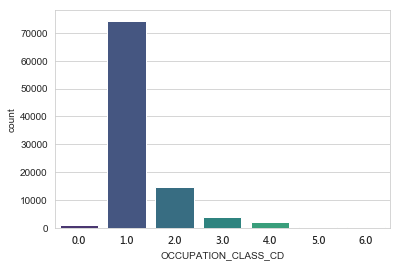

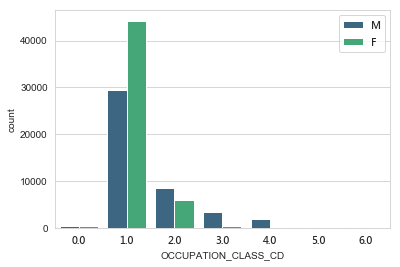

-------------------------------
1.0:
F    44253
M    29553
Name: GENDER, dtype: int64
F(%): 59.958539956101134
M(%): 40.041460043898866
-------------------------------
nan:
M    2104
F    1831
Name: GENDER, dtype: int64
F(%): 46.53113087674714
M(%): 53.46886912325286
-------------------------------
2.0:
M    8530
F    5927
Name: GENDER, dtype: int64
F(%): 40.99744068617279
M(%): 59.002559313827206
-------------------------------
3.0:
M    3430
F     380
Name: GENDER, dtype: int64
F(%): 9.973753280839896
M(%): 90.02624671916011
-------------------------------
5.0:
M    212
F     13
Name: GENDER, dtype: int64
F(%): 5.777777777777778
M(%): 94.22222222222221
-------------------------------
4.0:
M    1902
F     115
Name: GENDER, dtype: int64
F(%): 5.701536936043629
M(%): 94.29846306395638
-------------------------------
6.0:
M    164
F     38
Name: GENDER, dtype: int64
F(%): 18.81188118811881
M(%): 81.1881188118812
-------------------------------
0.0:
M    478
F    387
Name: GENDER, dtype: 

In [18]:
#　性別與職業風險類別有一定相關性
count_and_percent("OCCUPATION_CLASS_CD", train, "GENDER")

In [19]:
# gender和職業類別同為NaN
len(train[(train["GENDER"].isnull()) & train["OCCUPATION_CLASS_CD"].isnull() ])

25

### (5)Two features: GENDER (性別) & BMI(神秘轉換):(Involve one feature:BMI)
* BMI missing values: 16,645
* There are no big differences between Female & Male(BMI).
* BMI 是否在[0, 0.2)可做為一個新特徵訓練模型 (其他欄位也都可以採用類似方式做)；概念是在這區間可以很有把握是N而在其他區間則無法下結論，因此捨去整個BMI的資料，加入此項。=>或是就算沒有建立此特徵，也可以做為一個特殊發現於報告中。
* 於[0.2, 0.3]補值可能可以讓圖形更接近常態(不管是用NY分別，或是用FM分別的分配圖)



In [23]:
# NaN in BMI
print(abs(train["BMI"].value_counts().sum() - 100000))

16645


In [27]:
# 基本統計量
train["BMI"].describe()

count    83355.000000
mean         0.264241
std          0.091367
min          0.000000
25%          0.200000
50%          0.275000
75%          0.325000
max          0.925000
Name: BMI, dtype: float64

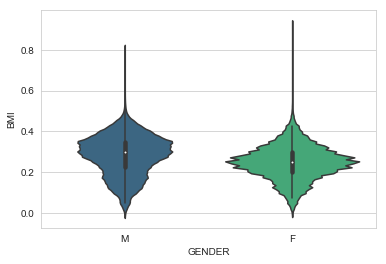

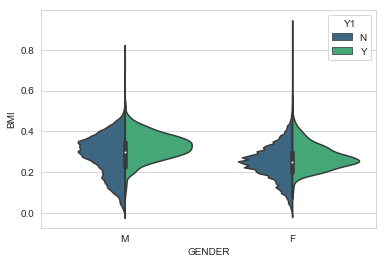

In [29]:
# Gender, BMI violin
# 女性的平均、中位數約小於男性，女性最大值大於男性，女性分配對稱，男性有一缺口(仍可視為約對稱)
# N為多數，因此對男性或女性，N的BMI分配，皆和全部男性的BMI分配類似。可以發現Y的分配皆較平滑。
# 於[0.0, 0.2)之間觀察到N/Y分別
# violin plot: https://en.wikipedia.org/wiki/Violin_plot

sns.violinplot(x="GENDER", y="BMI", data=train, split=True, palette="viridis")
plt.show()

sns.violinplot(x="GENDER", y="BMI", data=train, hue="Y1", split=True, palette="viridis")
plt.show()


Text(0.5, 0, 'BMI')

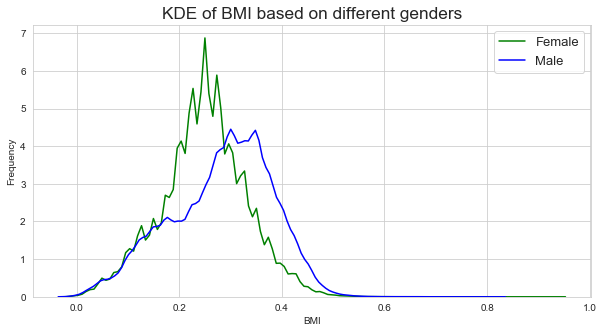

In [45]:
# Gender, BMI dist.
plt.figure(figsize=(10, 5))
sns.distplot(train[train["GENDER"] == "F"]["BMI"], bins=30, kde=True, 
             hist=False, color="green",
             label="Female")
sns.distplot(train[train["GENDER"] == "M"]["BMI"], bins=30, kde=True, 
             hist=False, color="blue", 
             label="Male")

plt.title("KDE of BMI based on different genders", fontdict={"fontsize":"xx-large"})
plt.legend(fontsize=13)
plt.ylabel("Frequency")
plt.xlabel("BMI")


In [33]:
# BMI為NaN男女的數量差不多
train[train["BMI"].isnull()]["GENDER"].value_counts(dropna=False)

F      8377
M      8154
NaN     114
Name: GENDER, dtype: int64

In [36]:
# Y類別 > 2% ，但沒有很高 
train[train["BMI"].isnull()]["Y1"].value_counts()
print("N%:", 1621800/(16218+427))
print("Y%:", 42700/(16218+427))

N%: 97.43466506458395
Y%: 2.565334935416041


In [185]:
# BMI GENDER同為遺失值
train[(train["GENDER"].isnull()) & train["BMI"].isnull() ].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 1036 to 99208
Columns: 132 entries, CUS_ID to Y1
dtypes: float64(30), int64(12), object(90)
memory usage: 118.5+ KB


In [15]:
#在[0, 0.2)半開區間過多N
train[(train["BMI"] < 0.2) & (train["BMI"] >= 0)][train[(train["BMI"] < 0.2) & (train["BMI"] >= 0)]["GENDER"] == "M"]["Y1"].value_counts()

N    7374
Y       8
Name: Y1, dtype: int64

Text(0.5, 0, 'BMI')

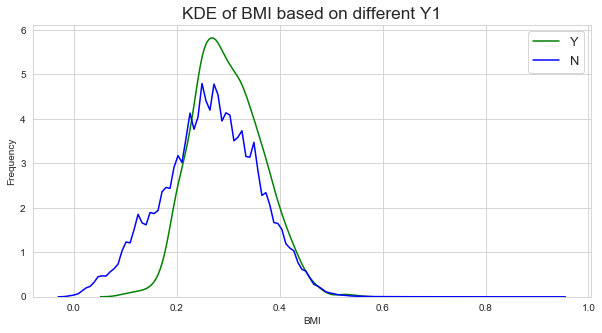

In [56]:
# 觀察圖片，BMI[0, 0.2]可能可以當作一個判定Y的依據
plt.figure(figsize=(10, 5))
sns.distplot(train[train["Y1"] == "Y"]["BMI"], bins=30, kde=True, 
             hist=False, color="green",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["BMI"], bins=30, kde=True, 
             hist=False, color="blue", 
             label="N")

plt.title("KDE of BMI based on different Y1", fontdict={"fontsize":"xx-large"})
plt.legend(fontsize=13)
plt.ylabel("Frequency")
plt.xlabel("BMI")


In [14]:
# Y比例相當低
print(train[(train["BMI"] < 0.2) & (train["BMI"] >= 0)]["Y1"].value_counts())
print("Y%:", 38/(16602+38))

N    16602
Y       38
Name: Y1, dtype: int64
Y%: 0.0022836538461538463


Text(0.5, 0, 'BMI')

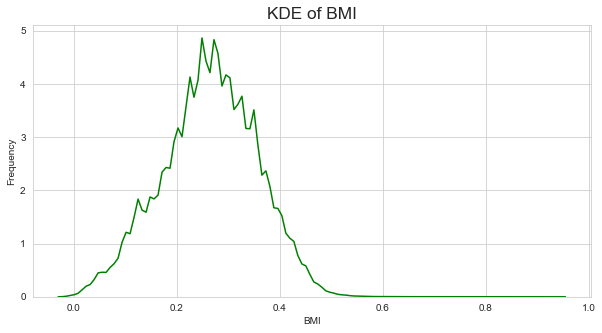

In [61]:
# dist =>偏向常態
plt.figure(figsize=(10, 5))
sns.distplot(train["BMI"], bins=30, kde=True, 
             hist=False, color="green")

plt.title("KDE of BMI", fontdict={"fontsize":"xx-large"})
plt.ylabel("Frequency")
plt.xlabel("BMI")


In [84]:
# 假設M的圖形應偏向常態分配，則可能為 [0, 0.2]次數太多 or [0.2, 0.3]次數太少。先假定資料正確情況下，認為後者較可能(NAN造成)
# 則遺失值可能出現在[0.2, 0.3]
# 檢查male/female。若把遺失值加入[0.2, 0.3]則整體圖形可能會更接近常態
train[train["BMI"].isnull()]["GENDER"].value_counts()

F    8377
M    8154
Name: GENDER, dtype: int64

In [16]:
train[(train["BMI"] <= 0.3) & (train["BMI"] >= 0.2)]["Y1"].value_counts()

N    40257
Y      906
Name: Y1, dtype: int64

In [17]:
print("N%:", 40257/(40257 + 906))
print("Y%:", 906/(40257 + 906))

N%: 0.9779899424240216
Y%: 0.022010057575978428


In [68]:
# 計算缺值部分n/y比例
train[train["BMI"].isnull()]["Y1"].value_counts()

N    16218
Y      427
Name: Y1, dtype: int64

In [69]:
#若加入遺失值至此區間，則Ｎ減少Ｙ增加(使圖形更近常態)
print("N%:", 16218/(16218 + 427))
print("Y%:", 427/(16218 + 427))

N%: 0.9743466506458396
Y%: 0.025653349354160408


#### (5-1)BMI遺失值觀察:
* Y的比例稍微超過2%

In [35]:
report1 = train[train["BMI"].isnull()]["Y1"].value_counts()
print(report1)
print("----------------")
print("Y%:", (report1["Y"] * 100) /(report1["N"] + report1["Y"]))
print("N%:", (report1["N"] * 100) /(report1["N"] + report1["Y"]))

N    16218
Y      427
Name: Y1, dtype: int64
----------------
Y%: 2.565334935416041
N%: 97.43466506458395


### (6)Feature engineering: if_bmi_in    (BMI是否於[0.0, 0.2) )
* Note:Nan一律當成是False(根據上述分析，假定常態情況，上述補值頃向於補在範圍外)

註:發想來源:根據BMI欄位分配圖觀察

#### step1:欄位建置(建置於train_v1子集)

In [26]:

def if_bmi_in_build(col):

    if pd.isnull(col):
        return False
    
    elif col >= 0 and col < 0.2: 
        return True
    
    else:
        return False
    

In [27]:
train_v1["if_bmi_in"] = train_v1["BMI"].apply(if_bmi_in_build)

#### step2:觀察

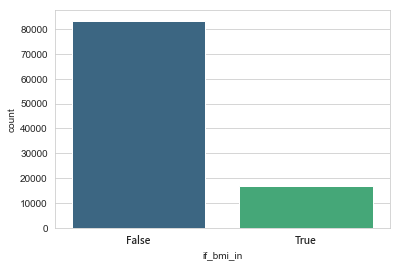

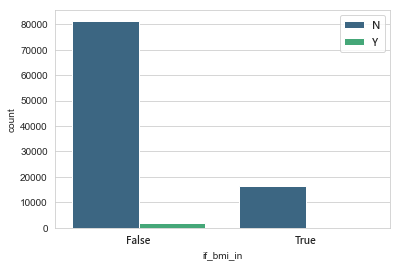

-------------------------------
True:
N    16602
Y       38
Name: Y1, dtype: int64
N(%): 99.77163461538461
Y(%): 0.22836538461538464
-------------------------------
False:
N    81398
Y     1962
Name: Y1, dtype: int64
N(%): 97.64635316698657
Y(%): 2.353646833013436


In [31]:
# 如果為True則大多為N
count_and_percent("if_bmi_in", train_v1, "Y1")

### (7)Feature engineering: 基本項目遺失值、生調表或健康報告書遺失值、前三者綜合遺失值

建構一系列是否有遺失值的欄位(True:有遺失值；False:無遺失值)
欄位說明:
* if_basic_nan =>是否有遺失值，考慮欄位:GENDER", "EDUCATION_CD", "MARRIAGE_CD","OCCUPATION_CLASS_CD", "ANNUAL_INCOME_AMT", "BMI"

* if_basic_nan_1=>是否有遺失值，考慮欄位:"GENDER", "OCCUPATION_CLASS_CD"

* if_basic_nan_2=>是否有遺失值，考慮欄位:"EDUCATION_CD", "MARRIAGE_CD", "ANNUAL_INCOME_AMT", "BMI"

Note: 1，2分別基礎為來源地不同，1是來自於基本資料表單資訊，2是來自於生調表及健康報告書

註:發想來源是Occupation欄位遺失值類別Y比例的偏重

**原先推測可能沒有基本資料的客戶為純諮詢沒買保險客戶，才導致漏填缺值，但後續於第(10)章節驗證AB通路購買新契約數，證明這個推論是錯誤的**

**因此目前對於遺失值產生原因無法得到好的解釋，至於這個章節，以及第(9)章節相關分析，可以嘗試參考用來配適模型，但有可能這裡的現象只是巧合，不具任何意義**


#### step1:欄位建置(建置於train_v2子集)

In [42]:

# build Nan basic information numbers col(全項目)
def basic_nan_count(cols):
    
    gender = cols[0]
    edu = cols[1]
    marriage = cols[2]
    occ = cols[3]
    aincome = cols[4]
    bmi = cols[5]
    
    return (pd.isnull(gender) + pd.isnull(edu) + pd.isnull(marriage) 
            + pd.isnull(occ) + pd.isnull(aincome) + pd.isnull(bmi))

def basic_nan_if(cols):
    
    if cols >= 1:
        return True
    else:
        return False
    
# 於基本資料表中的項目
def basic_nan_count1(cols):
    gender = cols[0]
    occ = cols[1]
    return (pd.isnull(gender) + pd.isnull(occ))

    
# 於生調表中項目
def basic_nan_count2(cols):
    edu = cols[0]
    marriage = cols[1]
    aincome = cols[2]
    bmi = cols[3]
    return (pd.isnull(edu) + pd.isnull(marriage) + pd.isnull(aincome) + pd.isnull(bmi))

    

In [43]:
train_v2 = pd.DataFrame(train[["GENDER", "EDUCATION_CD", "MARRIAGE_CD",
                               "OCCUPATION_CLASS_CD", "ANNUAL_INCOME_AMT", "BMI"]].apply(basic_nan_count, axis=1), 
                        columns=["basic_nan"])
train_v2["Y1"] = train["Y1"]

In [44]:
train_v2["if_basic_nan"] = train_v2["basic_nan"].apply(basic_nan_if)

In [45]:
train_v2["basic_nan_1"] = train[["GENDER", "OCCUPATION_CLASS_CD"]].apply(basic_nan_count1, axis=1)

train_v2["basic_nan_2"] = train[["EDUCATION_CD", "MARRIAGE_CD", "ANNUAL_INCOME_AMT", "BMI"]].apply(basic_nan_count2, axis=1)

In [46]:
train_v2["if_basic_nan_1"] = train_v2["basic_nan_1"].apply(basic_nan_if)
train_v2["if_basic_nan_2"] = train_v2["basic_nan_2"].apply(basic_nan_if)

In [47]:
train_v2["OCCUPATION_CLASS_CD"] = train["OCCUPATION_CLASS_CD"]

#### step2:觀察

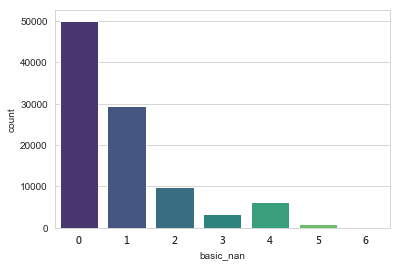

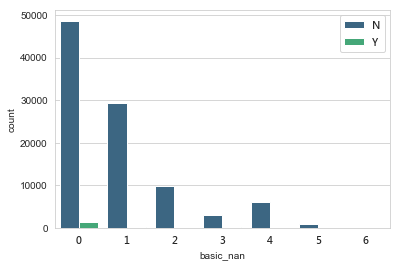

-------------------------------
2:
N    9867
Y      65
Name: Y1, dtype: int64
N(%): 99.3455497382199
Y(%): 0.6544502617801047
-------------------------------
0:
N    48652
Y     1398
Name: Y1, dtype: int64
N(%): 97.20679320679321
Y(%): 2.793206793206793
-------------------------------
1:
N    29289
Y      263
Name: Y1, dtype: int64
N(%): 99.11004331348133
Y(%): 0.889956686518679
-------------------------------
3:
N    3110
Y     194
Name: Y1, dtype: int64
N(%): 94.12832929782083
Y(%): 5.871670702179177
-------------------------------
4:
N    6119
Y      23
Name: Y1, dtype: int64
N(%): 99.62552914360143
Y(%): 0.3744708563985672
-------------------------------
5:
N    958
Y     56
Name: Y1, dtype: int64
N(%): 94.47731755424064
Y(%): 5.522682445759369
-------------------------------
6:
N    5
Y    1
Name: Y1, dtype: int64
N(%): 83.33333333333334
Y(%): 16.666666666666664


In [21]:
count_and_percent("basic_nan", train_v2, "Y1")

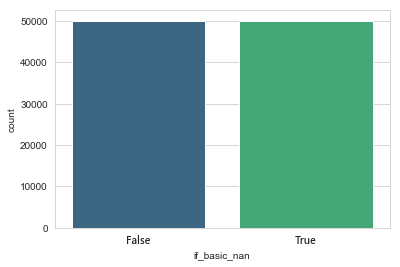

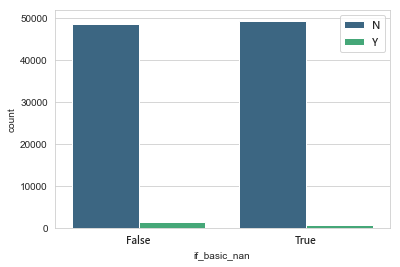

-------------------------------
True:
N    49348
Y      602
Name: Y1, dtype: int64
N(%): 98.7947947947948
Y(%): 1.2052052052052054
-------------------------------
False:
N    48652
Y     1398
Name: Y1, dtype: int64
N(%): 97.20679320679321
Y(%): 2.793206793206793


In [22]:
count_and_percent("if_basic_nan", train_v2, "Y1")

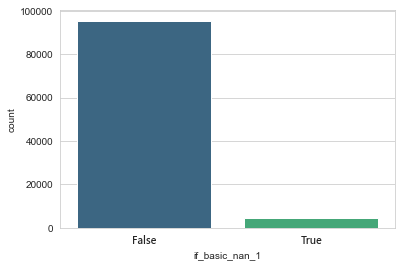

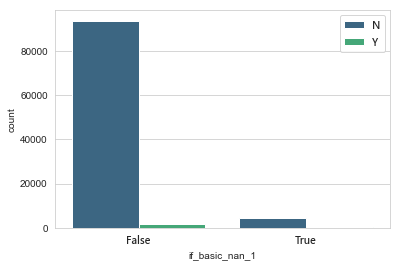

-------------------------------
False:
N    93682
Y     1700
Name: Y1, dtype: int64
N(%): 98.21769306577761
Y(%): 1.7823069342223898
-------------------------------
True:
N    4318
Y     300
Name: Y1, dtype: int64
N(%): 93.5036812472932
Y(%): 6.4963187527068


In [23]:
# 基本資料缺值的人在這裡Y的比例很大=>或許缺值的人可視為是只諮詢沒買保單的人
count_and_percent("if_basic_nan_1", train_v2, "Y1")

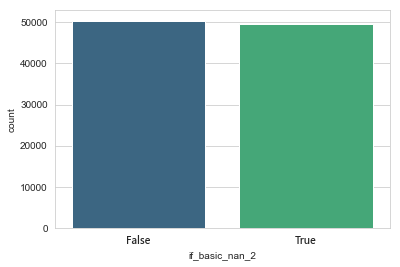

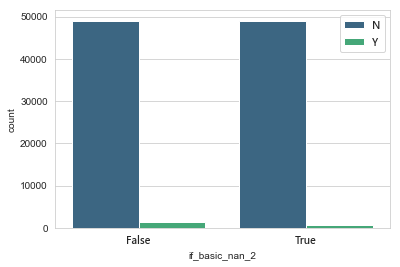

-------------------------------
True:
N    49024
Y      589
Name: Y1, dtype: int64
N(%): 98.81281115836575
Y(%): 1.187188841634249
-------------------------------
False:
N    48976
Y     1411
Name: Y1, dtype: int64
N(%): 97.19967451922122
Y(%): 2.8003254807787723


In [17]:
count_and_percent("if_basic_nan_2", train_v2, "Y1")

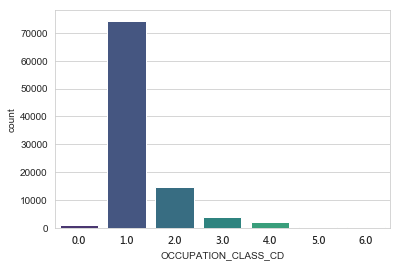

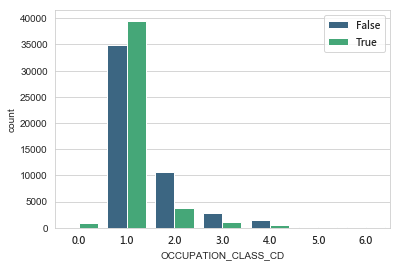

-------------------------------
1.0:
True     39537
False    34835
Name: if_basic_nan, dtype: int64
False(%): 46.8388640886355
True(%): 53.16113591136449
-------------------------------
nan:
True    3960
Name: if_basic_nan, dtype: int64
True(%): 100.0
-------------------------------
2.0:
False    10748
True      3769
Name: if_basic_nan, dtype: int64
False(%): 74.03733553764552
True(%): 25.96266446235448
-------------------------------
3.0:
False    2742
True     1085
Name: if_basic_nan, dtype: int64
False(%): 71.6488110791743
True(%): 28.35118892082571
-------------------------------
5.0:
False    143
True      83
Name: if_basic_nan, dtype: int64
False(%): 63.27433628318584
True(%): 36.72566371681416
-------------------------------
4.0:
False    1429
True      596
Name: if_basic_nan, dtype: int64
False(%): 70.5679012345679
True(%): 29.432098765432098
-------------------------------
6.0:
False    116
True      86
Name: if_basic_nan, dtype: int64
False(%): 57.42574257425742
True(%): 42.5

In [19]:
count_and_percent("OCCUPATION_CLASS_CD", train_v2, "if_basic_nan")

### (8)One feature:EDUCATION_CD(教育程度/學歷):  

* 一般學歷分類法:國中以下；高中職；大專院校；研究所
* 此為了方便後續多變量觀察，暫時將NaN變為類別0。(更改於train_v1，train保留原資料)(另外根據比例增加趨勢，或許把NAN當成一類會有不錯表現)(NAN呈現之Y比例極少)
* 推測1->4學位越來越高:4應該為碩博士；3為大學;12為高中以下(根據:1.一般學歷分類方法2.教育程度、年齡長條圖=>詳見9-2章節)
* 教育程度分數越高，Y1比例越重。(123類別數量皆多，4類別雖少，但根據123增加趨勢，仍可有一定可信度)
* 現象解釋:學歷越高保險觀念越強。

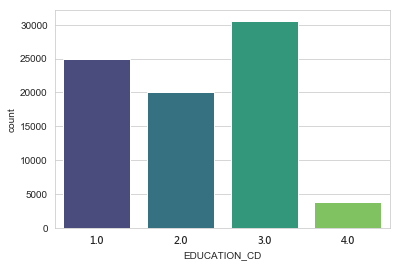

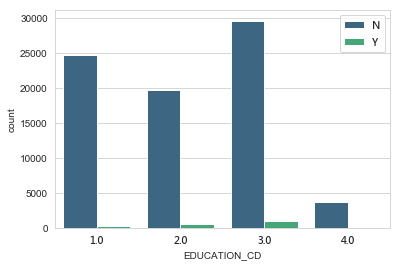

-------------------------------
nan:
N    20427
Y      135
Name: Y1, dtype: int64
N(%): 99.34344908082872
Y(%): 0.6565509191712868
-------------------------------
1.0:
N    24654
Y      219
Name: Y1, dtype: int64
N(%): 99.1195271981667
Y(%): 0.8804728018333133
-------------------------------
2.0:
N    19630
Y      490
Name: Y1, dtype: int64
N(%): 97.56461232604374
Y(%): 2.4353876739562623
-------------------------------
3.0:
N    29602
Y      984
Name: Y1, dtype: int64
N(%): 96.7828418230563
Y(%): 3.2171581769436997
-------------------------------
4.0:
N    3687
Y     172
Name: Y1, dtype: int64
N(%): 95.54288675822752
Y(%): 4.45711324177248


In [60]:
# 教育程度分數越高=>Y1比例越重(推測1->4學位越來越高:4應該為碩博士；3為大學;12為高中以下)，學歷越高保險觀念越強
count_and_percent("EDUCATION_CD", train, "Y1")

#### (8-1)EDUCATION_CD遺失值觀察:
* 有20562個遺失值
* Y的比例很低

In [62]:
print("遺失值數量:", len(train_v1[train_v1["EDUCATION_CD"] == 0.0]))

遺失值數量: 20562


In [63]:
report2 = train_v1[train_v1["EDUCATION_CD"] == 0.0]["Y1"].value_counts()
print(report2)
print("------------------")
print("Y%:", (report2["Y"] * 100) / (report2["Y"] + report2["N"]) )
print("N%:", (report2["N"] * 100) / (report2["Y"] + report2["N"]) )

N    20427
Y      135
Name: Y1, dtype: int64
------------------
Y%: 0.6565509191712868
N%: 99.34344908082872


### (9)Multi-features: EDUCATION_CD(教育程度/學歷)、AGE(年齡(年)(級距) )、3個基本資料遺失值特徵

#### (9-1)AGE:年齡(年)(級距) =>順序尺度
* 年齡欄位無遺失值
* 重疾險一般投保年齡，因為繳費年期不同，會有不同限制，但最高就是60歲(即繳費期滿不超過70歲)。
https://www.cathaylife.com.tw/ts/web/ext/pages/product/insurance/insuranceProduct/health/health.html#pro_2
* 這個資料集仍可能有超過60歲的資料，因為其他險種年齡限制較寬鬆。且不管幾歲仍可作為要保人(不做被保人)。
# 好像錯了
* 可確定年齡為'高'者，有含概到可投保的年齡(觀察圖仍有Y存在)，意即'高'類別介於[m,n), where m <60   



* 根據9-2章節結果，可推測年齡"低"者的上限(中的下線)，應落於2X歲。原因是年齡低者在所有教育程度存在。
* 年齡低者未投保可能原因:
    
    A.保險觀念較差:認為還年輕不會有事(對此類產品)，或不相信任何保險相關產品(對任何產品，不侷限重疾險)
    
    B.收入過低負擔不起保費(也可能雖然該名客戶為要保人，但家人幫忙負擔保費) =>**已由後續圖表驗證**
    
    C.父母已幫忙購買重疾險，此名客戶為被保險人身份存在於客戶名單；保險商品購買皆由父母處理，但目前未作為重疾險被保險人(父母還沒幫忙買)
    
    D.已購買重疾險(任何年齡層的任何人都有此原因存在)
    
    E.未到達可簽保險合約年齡
    
    NOTE:ABC可同時發生
    

* 年齡高者未投保原因:
    
    A.年齡太大，保費會較貴(不願意支付或沒能力支付)(也可能雖然該名客戶為要保人，但家人幫忙負擔保費) =>**已由後續圖表驗證**
    
    B.超過投保年齡
    
    C.核保未通過(重疾險須為"強體"，標準高)
    
    D.家族內其他人已幫忙購買重疾險，此名客戶為被保險人身份存在於客戶名單；保險商品購買皆由家族某成員處理，但目前未作為重疾險被保險人(家人還沒幫忙買)
    
    E.已購買重疾險(任何年齡層的任何人都有此原因存在)
    
    F.太有錢了覺得沒有購買必要 =>**已由後續圖表驗證**
    
 
* 該欄位無過少數類別，因此各類別的有無購買重疾險比例，較能夠信賴
* 中、中高類別有Y比例較高的現象
    



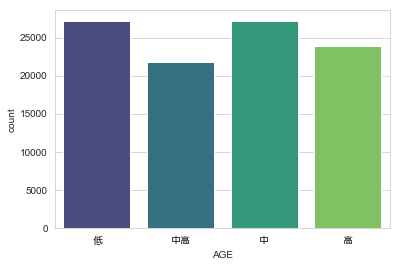

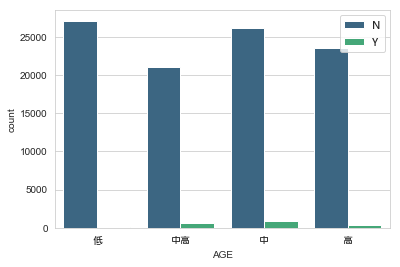

-------------------------------
低:
N    27125
Y       88
Name: Y1, dtype: int64
N(%): 99.67662514239518
Y(%): 0.32337485760482126
-------------------------------
中高:
N    21083
Y      654
Name: Y1, dtype: int64
N(%): 96.9913051479045
Y(%): 3.008694852095505
-------------------------------
中:
N    26205
Y      943
Name: Y1, dtype: int64
N(%): 96.52644762045087
Y(%): 3.4735523795491376
-------------------------------
高:
N    23587
Y      315
Name: Y1, dtype: int64
N(%): 98.6821186511589
Y(%): 1.3178813488411012


In [13]:
# 年齡低保險觀念較差，故Y比例低，或是收入較差所以負擔不起保費，或是由父母幫忙投保所以不須投保(作為被保險人出現於客戶名單)
# 年齡太高，保費太貴(或核保沒過，或超過可投保年齡)
count_and_percent("AGE", train, "Y1")

#### (9-1-1)延伸9-1，觀察AGE vs ANNUAL_INCOME_AMT (年收入 (神秘轉換&歸一化) ) :由於經轉換，無法判斷比較大就代表收入高
* ANNUAL_INCOME_AMT具有39201個遺失值
* 透過圖表推測此值較高則收入較高。因為離群值是較大的數值。(這個神秘轉換應該不會讓數字間大小完全亂掉=>否則會變成沒有意義的欄位)
* 超高收入值集中在沒有買重疾險高年齡者
* 沒有購買重疾險的高齡者有稍微偏向收入較低的現象(以中位數、四分位數判定)(不考慮超高收入離群值)
* 年齡低的人的確比其他年齡層的人收入都還來得低。但年齡低有購買重疾險者沒有顯著比沒買者有錢(反而更沒錢)。

* note:發想來源:驗證低、高年齡不投保原因

In [14]:
print("遺失值數量:", sum(train["ANNUAL_INCOME_AMT"].isnull()))

遺失值數量: 39201


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

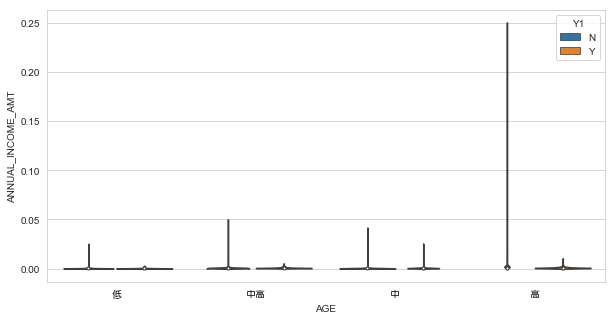

In [15]:
# 超高收入集中在沒有買重疾險高年齡者
plt.figure(figsize=[10, 5])
sns.violinplot(x="AGE", y="ANNUAL_INCOME_AMT", hue="Y1", data=train)
plt.xticks(fontproperties=font_heavy)

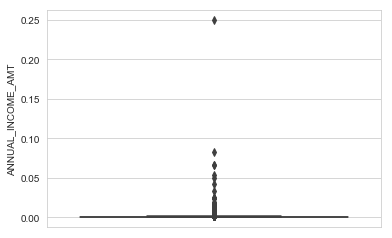

In [16]:
# 年齡高的INCOME盒鬚圖
sns.boxplot(y="ANNUAL_INCOME_AMT", data=train[train["AGE"] == "高"])

In [17]:
# 高年齡人的INCOME
des1 = train[train["AGE"] == "高"]["ANNUAL_INCOME_AMT"].describe()
print(des1)

count    1.763700e+04
mean     8.564669e-04
std      2.412591e-03
min      8.000000e-08
25%      4.166570e-04
50%      6.249900e-04
75%      8.333230e-04
max      2.500000e-01
Name: ANNUAL_INCOME_AMT, dtype: float64


In [18]:
# 共23902高年齡者
train[train["AGE"] == "高"]["AGE"].value_counts()

高    23902
Name: AGE, dtype: int64

In [19]:
# 1.5倍IQR離群值觀察
IQR = des1["75%"] - des1["25%"]

inner_f = des1["75%"] + IQR * 1.5
out_f = des1["75%"] + IQR * 3

in_outlier = train[train["AGE"] == "高"][train[train["AGE"] == "高"]["ANNUAL_INCOME_AMT"] >= inner_f]
report3 = in_outlier["Y1"].value_counts()

out_outlier = train[train["AGE"] == "高"][train[train["AGE"] == "高"]["ANNUAL_INCOME_AMT"] >= out_f]
report4 = out_outlier["Y1"].value_counts()

# .05界線

outlier_005 = train[train["AGE"] == "高"][train[train["AGE"] == "高"]["ANNUAL_INCOME_AMT"] >= 0.05]
report5 = outlier_005["Y1"].value_counts()


print("inner:")
print(report3)
print("-----------------------")
print("Y%:", (report3["Y"] * 100) / (report3["Y"] + report3["N"]))
print("N%:", (report3["N"] * 100) / (report3["Y"] + report3["N"]))

print("-----------------------")
print("-----------------------")
print("our:")
print(report4)
print("-----------------------")
print("Y%:", (report4["Y"] * 100) / (report4["Y"] + report4["N"]))
print("N%:", (report4["N"] * 100) / (report4["Y"] + report4["N"]))

print("-----------------------")
print("-----------------------")
print("0.05:")
print(report5)


inner:
N    1834
Y      34
Name: Y1, dtype: int64
-----------------------
Y%: 1.8201284796573876
N%: 98.17987152034262
-----------------------
-----------------------
our:
N    985
Y     16
Name: Y1, dtype: int64
-----------------------
Y%: 1.5984015984015985
N%: 98.4015984015984
-----------------------
-----------------------
0.05:
N    5
Name: Y1, dtype: int64


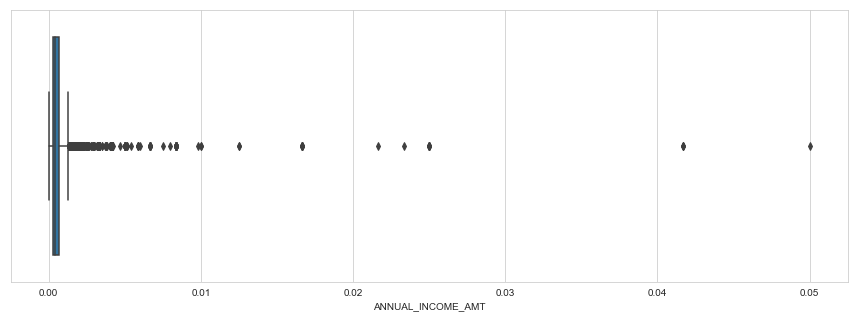

In [20]:
# 觀察離群值除外的高年齡income盒鬚圖
plt.figure(figsize=[15, 5])
sns.boxplot(y="ANNUAL_INCOME_AMT", data=train.drop(in_outlier.index, axis=0), orient="h")

(-0.0005, 0.005)

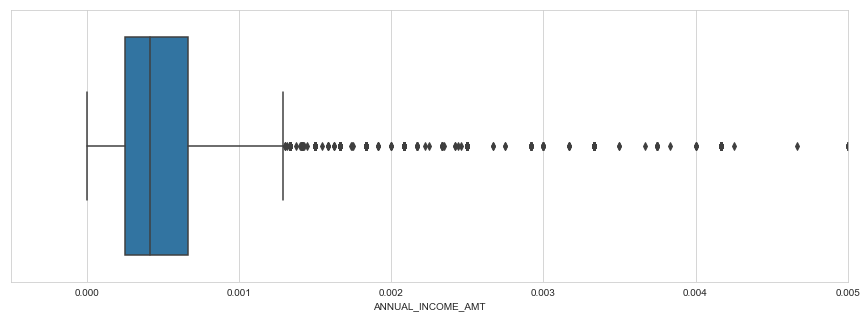

In [30]:
# 觀察0.005內的高年齡income盒鬚圖
plt.figure(figsize=[15, 5])
sns.boxplot(y="ANNUAL_INCOME_AMT", data=train.drop(in_outlier.index, axis=0), orient="h")
plt.xlim([-0.0005, 0.005])

(-0.0005, 0.005)

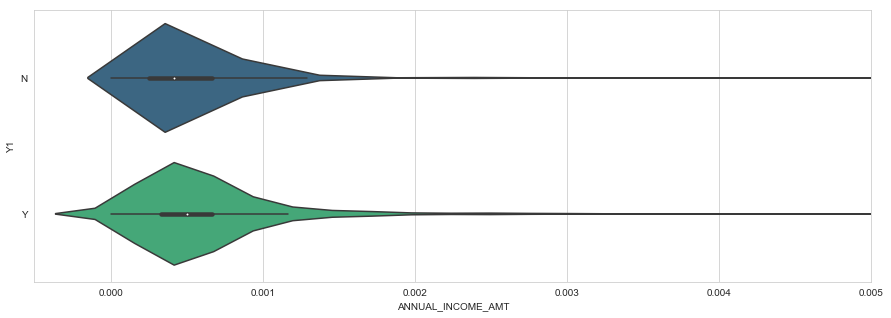

In [22]:
# 沒有購買重疾險的高齡者有稍微偏向收入較低的現象
plt.figure(figsize=[15, 5])
sns.violinplot(x="ANNUAL_INCOME_AMT", y="Y1", data=train.drop(in_outlier.index, axis=0), palette="viridis")
plt.xlim([-0.0005, 0.005])

(-0.0005, 0.005)

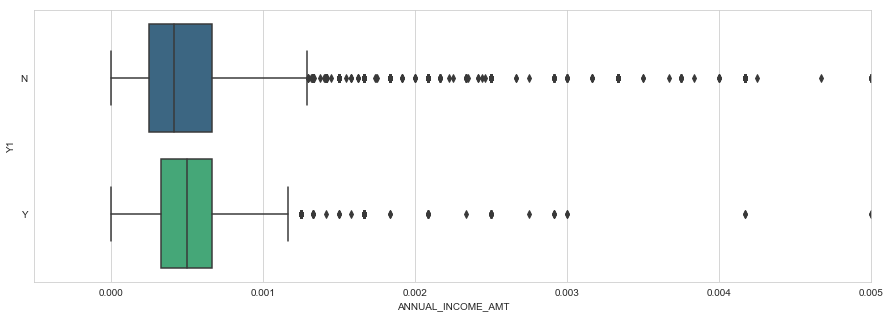

In [52]:
plt.figure(figsize=[15, 5])
sns.boxplot(x="ANNUAL_INCOME_AMT", y="Y1", data=train.drop(in_outlier.index, axis=0), palette="viridis")
plt.xlim([-0.0005, 0.005])

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


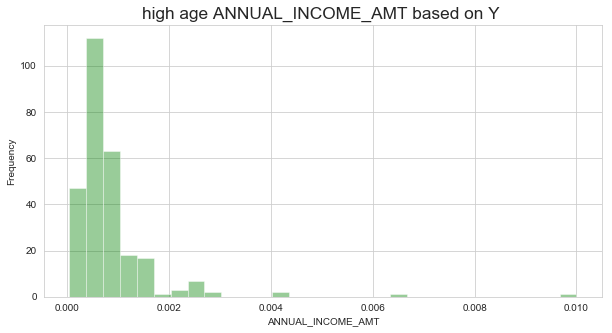

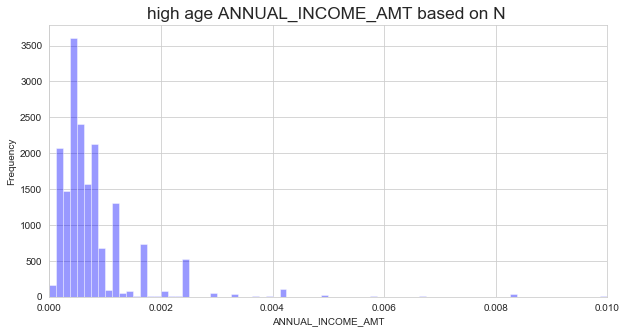

In [21]:
# 在高齡的情況下，有購買重疾險高峰出現在比沒有重疾險的人收入高的位置
plt.figure(figsize=(10, 5))

sns.distplot(train[(train["AGE"] == "高") & (train["Y1"] == "Y")]["ANNUAL_INCOME_AMT"], bins=30, kde=False, 
             hist=True, color="green")


plt.title("high age ANNUAL_INCOME_AMT based on Y ", fontdict={"fontsize":"xx-large"})
plt.ylabel("Frequency")
plt.xlabel("ANNUAL_INCOME_AMT")
plt.show()

plt.figure(figsize=(10, 5))
sns.distplot(train[(train["AGE"] == "高") & (train["Y1"] == "N")]["ANNUAL_INCOME_AMT"], bins=2000, kde=False, 
             hist=True, color="blue")

plt.title("high age ANNUAL_INCOME_AMT based on N ", fontdict={"fontsize":"xx-large"})
plt.ylabel("Frequency")
plt.xlabel("ANNUAL_INCOME_AMT")
plt.xlim([0, 0.01])
plt.show()


(0, 0.01)

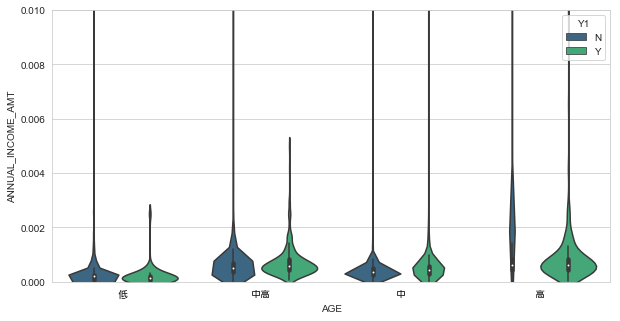

In [92]:
# 觀察年齡低的人=>的確比其他年齡層的人都還來得低
plt.figure(figsize=[10, 5])
sns.violinplot(x="AGE", y="ANNUAL_INCOME_AMT", hue="Y1", data=train, palette="viridis")
plt.xticks(fontproperties=font_heavy)
plt.ylim([0, 0.01])

(0, 0.005)

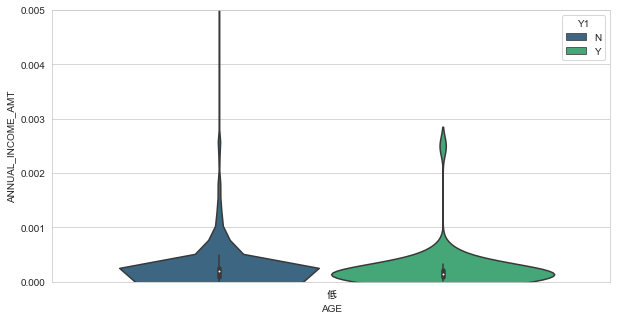

In [94]:
# 放大觀察低年齡。Y未必比N有錢
plt.figure(figsize=[10, 5])
sns.violinplot(x="AGE", y="ANNUAL_INCOME_AMT", hue="Y1", data=train[train["AGE"]=="低"], palette="viridis")
plt.xticks(fontproperties=font_heavy)
plt.ylim([0, 0.005])

#### (9-1-2)延伸9-1-1，低年齡者Y值在保戶二代下的比例 & 延伸9-1，AGE vs IF_2ND_GEN_IND (是否為保戶二代(Y/N)):
* 發想來源:

    1.根據低齡者NY小提琴圖，Y並沒有顯著比N有錢甚至反而更沒錢，可能和是父母代繳有關(但小孩仍為要保人之情況)，在此種情況下父母有很大機率自己也是保戶，故觀察和保戶二代欄位關係
    
    2.驗證低年齡不投保原因
    
* 結果:
    
    * 低年齡者大多為保戶二代
    * 沒有購買重疾險，且為低年齡者，為保戶二代比例96%(約26000)。這些人可能有部分實際上是重疾險被保險人，父母是要保人(雖本人沒買但有保障)。也就是有下列幾種情況:(a)父母幫忙買(因該名客戶為保戶二代所以機會相對大) (b)其他親戚幫忙買(非父母) (c)真的沒有任何保障(非被保險人)=>回歸AGE部分探討的原因。
    * 沒有購買重疾險，且為低年齡者，但不為保戶二代比例4%(約1000)。有幾種情況:(a)其他親戚幫忙買(非父母)(b)真的沒有任何保障(非被保險人)=>回歸AGE部分探討的原因。另外，此項目取決於保互二代的定義，保互指的若為要保人，則在這裡不會有父母幫忙買的情況。
    * 有購買重疾險，且為低年齡者，數量非常少(僅88人)。73人為保戶二代，可能是(a)父母提供金錢支持(由於父母本身也是保戶，有保險觀念)(b)其他親戚或他人的支持 (c) 自己負擔的起保費。15人非保戶二代，則為(a)父母提供金錢支持(b)其他親戚或他人的支持 (c) 自己負擔的起保費。=>觀察後這88人並沒有特別突出的income，僅有1人達到約0.002(註:有部分遺失值存在)

In [104]:
# 低年齡者大多為保戶二代
train[train["AGE"] == "低"]["IF_2ND_GEN_IND"].value_counts()

Y    26069
N     1144
Name: IF_2ND_GEN_IND, dtype: int64

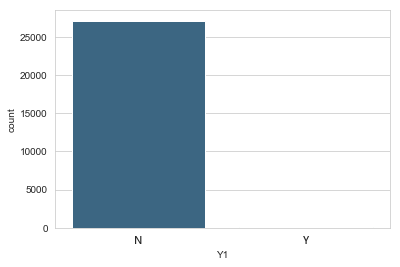

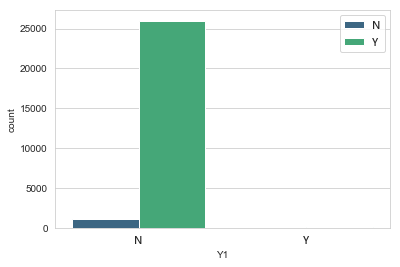

-------------------------------
N:
Y    25996
N     1129
Name: IF_2ND_GEN_IND, dtype: int64
N(%): 4.162211981566821
Y(%): 95.83778801843317
-------------------------------
Y:
Y    73
N    15
Name: IF_2ND_GEN_IND, dtype: int64
N(%): 17.045454545454543
Y(%): 82.95454545454545


In [102]:
count_and_percent("Y1", train[train["AGE"] == "低"], "IF_2ND_GEN_IND")

In [17]:
# 低年齡有購買重疾險少數個案觀察:不為保互二代
train[train["AGE"] == "低"][train[train["AGE"] == "低"]["Y1"] == "Y"][train[train["AGE"] == "低"][train[train["AGE"] == "低"]["Y1"] == "Y"]["IF_2ND_GEN_IND"] == "Y"]["ANNUAL_INCOME_AMT"].value_counts()

0.000208    7
0.000083    5
0.000050    4
0.000042    2
0.000125    2
0.000017    2
0.000300    1
0.000250    1
0.000008    1
0.000133    1
0.000200    1
0.000100    1
0.000067    1
0.000417    1
0.000583    1
0.000217    1
0.000500    1
0.000333    1
0.000200    1
0.000108    1
0.002500    1
Name: ANNUAL_INCOME_AMT, dtype: int64

In [18]:
train[train["AGE"] == "低"][train[train["AGE"] == "低"]["Y1"] == "Y"][train[train["AGE"] == "低"][train[train["AGE"] == "低"]["Y1"] == "Y"]["IF_2ND_GEN_IND"] == "N"]["ANNUAL_INCOME_AMT"].value_counts()

0.000167    3
0.000083    2
0.000250    1
0.000500    1
Name: ANNUAL_INCOME_AMT, dtype: int64

##### one feature: IF_2ND_GEN_IND (是否為保戶二代(Y/N)):
* 此欄位無遺失值
* 是否為保戶二代，和是否購買重疾險並無太大關聯。但非保戶二代者有購買比例較高，可能因為排除掉部分父母幫忙購買情況。同樣的是保戶二代者則被此種情況稀釋有購買重疾險數量。
* 年齡越高，越不會是保戶二代。父母已經死亡者，不確定還會不會視為保戶二代；但通常上個世代的人保險觀念較不完備，因此通常也非保戶
* 這裡和純年齡欄位的結論方向相反，只看AGE則年齡高投保比例是偏低的。但依照這裡的邏輯，年齡高則非保戶二代，則購買比例較高。

In [103]:
train["IF_2ND_GEN_IND"].value_counts()

Y    54315
N    45685
Name: IF_2ND_GEN_IND, dtype: int64

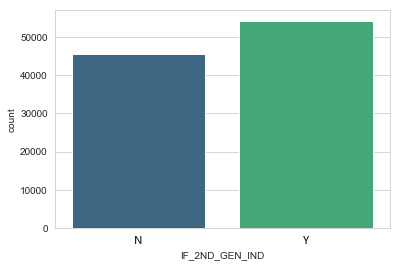

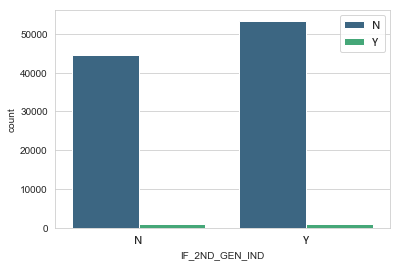

-------------------------------
N:
N    44592
Y     1093
Name: Y1, dtype: int64
N(%): 97.60752982379337
Y(%): 2.3924701762066323
-------------------------------
Y:
N    53408
Y      907
Name: Y1, dtype: int64
N(%): 98.33011138727792
Y(%): 1.669888612722084


In [19]:
# 是否為保戶二代，和是否購買重疾險並無太大關聯。但非保戶二代者有購買比例較高，可能因為排除掉部分父母幫忙購買情況。
# 同樣的是保戶二代者則被此種情況稀釋有購買重疾險數量。
count_and_percent("IF_2ND_GEN_IND", train, "Y1")

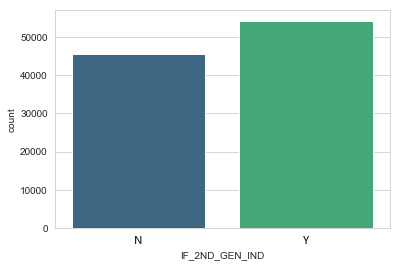

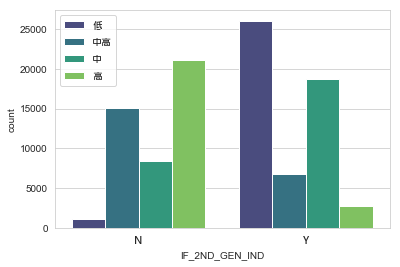

-------------------------------
N:
高     21162
中高    15020
中      8359
低      1144
Name: AGE, dtype: int64
中(%): 18.29703403743023
中高(%): 32.87731202801795
低(%): 2.5041041917478384
高(%): 46.32154974280399
-------------------------------
Y:
低     26069
中     18789
中高     6717
高      2740
Name: AGE, dtype: int64
中(%): 34.592653962993644
中高(%): 12.366749516708092
低(%): 47.99594955353033
高(%): 5.044646966767928


In [20]:
# 年齡越高則越不會是保戶二代(父母已經死亡者=>不確定還會不會視為保戶二代；但通常上個世代的人保險觀念較不完備，因此通常也非保戶)
count_and_percent("IF_2ND_GEN_IND", train, "AGE")

##### Addition: AGE高，但非保戶二代
* 年齡高則越不是保戶二代(根據前面部分分析)，所以此類別應該為多數
* 觀察後發現，年齡高非保戶二代，傾向購買重疾險比例偏低，也就是年齡的作用力在這裡比較強。非保戶二代在於排除掉父母幫忙小孩買情況，而在年齡高的狀況下用常理判斷的確是不具意義的。(父母存在性、父母通常退休無薪、自主性)=>依照常理判斷年齡越高自主性越強，保戶二代因子的影響性應該越弱，尤其到中高、高年齡時。
* 雖然比例偏低，但還是高於年齡高且是保戶二代者。因此上區段結論仍合理。=>但要注意的是如果沒有引進下一個區段補充概念，則中高年齡矩陣現象無法解釋。

發想來源:年齡欄位和非保戶的反作用力

In [22]:
v1 = train[train["AGE"] == "高"][train[train["AGE"] == "高"]["IF_2ND_GEN_IND"] == "N"]
v1["Y1"].value_counts()

N    20875
Y      287
Name: Y1, dtype: int64

In [26]:
report6 = v1["Y1"].value_counts()
print("N%:",(report6["N"] * 100)/(report6["Y"] + report6["N"]) )
print("Y%:",(report6["Y"] * 100)/(report6["Y"] + report6["N"]))

N%: 98.64379548246858
Y%: 1.3562045175314243


##### Addition: AGE、保戶二代Y%矩陣:
補充(其他解釋方式):是否為保戶二代可能有2個作用力:

(1)父母幫忙小孩買情況影響
(2)保險觀念的影響

結論:
* 年齡越高父母幫忙小孩買情況影響作用力下降，保險觀念的影響作用力上升，保險二代影響變成反向，產生中高年齡的情況。而高年齡是保戶二代者過少無法信賴其比例。(同樣的原因低年齡不是保戶二代的比例也較無法信賴)

Text(0.5, 1.0, 'Y Percentages of Categories of IF_2ND_GEN_IND & AGE')

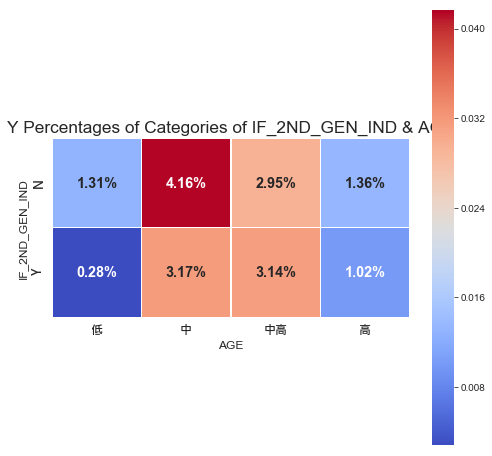

In [24]:
# pivot table
piv_tem= train_v1.pivot_table(values="Y", index="IF_2ND_GEN_IND", columns="AGE", aggfunc=agg_fun1)
piv_2nd_age_rat = piv_tem[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_2nd_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)

plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)


ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("IF_2ND_GEN_IND", size = "large")
plt.title("Y Percentages of Categories of IF_2ND_GEN_IND & AGE", fontdict={"fontsize":"xx-large"})


In [29]:
train[train["AGE"] == "高"][train[train["AGE"] == "高"]["IF_2ND_GEN_IND"] == "Y"]["Y1"].value_counts()

N    2712
Y      28
Name: Y1, dtype: int64

#### (9-1-2-1)Feature Engineering: AGE & IF_2ND_GEN_IND(是否為保戶二代(Y/N)):
(1) lowage_is2nd:低年齡者，且是保戶二代(傾向不買重疾險):收入低 + 父母可能幫忙買的作用

(2) midage_isnot2nd:中年齡者，且不是保戶二代(傾向購買重疾險)

(3) mihage_is2nd:中高年齡者，且是保戶二代(傾向購買重疾險)

以上幾種類別在數量上皆達一定數量。以上所使用欄位皆無NaN。

結果:從圖表中驗證了上面的描述，可作為一個說明，或是特徵選擇、新增欄位、刪除欄位的依據。

##### Step1:欄位建構(建構於train_v3)

In [34]:
train_v3 = pd.DataFrame(train[["AGE", "IF_2ND_GEN_IND", "ANNUAL_INCOME_AMT", "Y1"]], columns=["AGE", "IF_2ND_GEN_IND", "ANNUAL_INCOME_AMT", "Y1"])

In [36]:

def lowage_is2nd_f(cols):
    
    age = cols[0]
    is2nd = cols[1]
    
    if age == "低" and is2nd == "Y":
        return True
    
    else:
        return False

def midage_isnot2nd_f(cols):
    
    age = cols[0]
    is2nd = cols[1]
    
    if age == "中" and is2nd == "N":
        return True
    
    else:
        return False
    
def mihage_is2nd_f(cols):
    
    age = cols[0]
    is2nd = cols[1]
    
    if age == "中高" and is2nd == "Y":
        return True
    
    else:
        return False

In [37]:
train_v3["lowage_is2nd"] = train[["AGE", "IF_2ND_GEN_IND"]].apply(lowage_is2nd, axis=1)
train_v3["midage_isnot2nd"] = train[["AGE", "IF_2ND_GEN_IND"]].apply(midage_isnot2nd, axis=1)
train_v3["mihage_is2nd"] = train[["AGE", "IF_2ND_GEN_IND"]].apply(mihage_is2nd, axis=1)

##### step2:觀察

In [39]:
# 低年齡 是二代
train_v3["lowage_is2nd"].value_counts()

False    73931
True     26069
Name: lowage_is2nd, dtype: int64

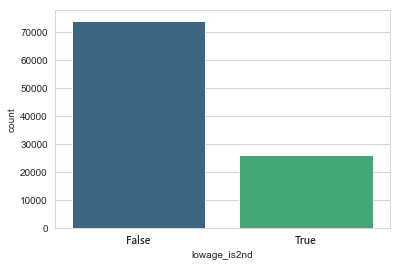

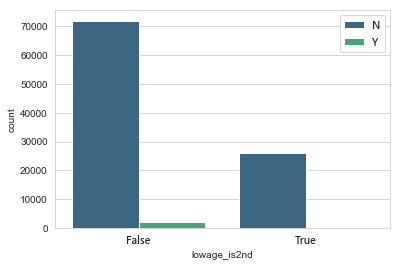

-------------------------------
False:
N    72004
Y     1927
Name: Y1, dtype: int64
N(%): 97.39351557533375
Y(%): 2.6064844246662426
-------------------------------
True:
N    25996
Y       73
Name: Y1, dtype: int64
N(%): 99.71997391537842
Y(%): 0.2800260846215812


In [42]:
# 低年齡是二代傾向不買重疾險
count_and_percent("lowage_is2nd", train_v3, "Y1")

In [40]:
# 中年齡 非二代
train_v3["midage_isnot2nd"].value_counts()

False    91641
True      8359
Name: midage_isnot2nd, dtype: int64

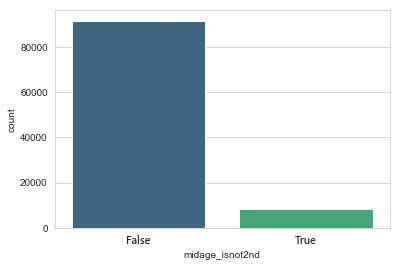

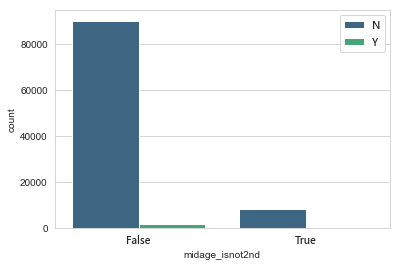

-------------------------------
False:
N    89989
Y     1652
Name: Y1, dtype: int64
N(%): 98.19731342957846
Y(%): 1.8026865704215362
-------------------------------
True:
N    8011
Y     348
Name: Y1, dtype: int64
N(%): 95.83682258643378
Y(%): 4.163177413566216


In [43]:
# 中年齡非二代，偏向會買重疾險
count_and_percent("midage_isnot2nd", train_v3, "Y1")

In [41]:
# 中高年齡 是二代
train_v3["mihage_is2nd"].value_counts()

False    93283
True      6717
Name: mihage_is2nd, dtype: int64

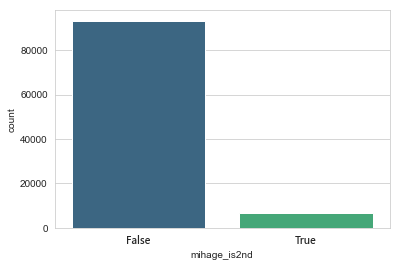

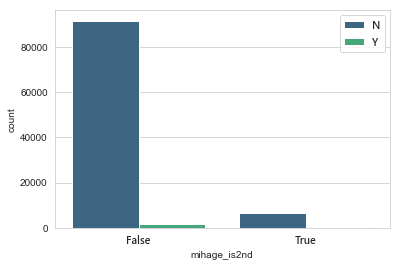

-------------------------------
False:
N    91494
Y     1789
Name: Y1, dtype: int64
N(%): 98.08218003280341
Y(%): 1.9178199671965952
-------------------------------
True:
N    6506
Y     211
Name: Y1, dtype: int64
N(%): 96.85871668899807
Y(%): 3.141283311001936


In [44]:
# 中高年齡是二代偏向會買重疾險
count_and_percent("mihage_is2nd", train_v3, "Y1")

#### (9-1-3)延伸9-1，配合後續推測，以"是否為要保人"觀察
* 發想來源:驗證低年齡不投保原因

In [ ]:
# 先不做，必要時可再來看

#### (9-2)two features:EDUCATION_CD & AGE
一、
* 4為最少的類別，推測為研究所
* 1測為國中以下(現在年齡只要未到大學，就算是高中在學一般也算在國中以下=>當然有時候在學也會算進去)，因為有很多低年齡者
* 2，3則由順序上來看合理推估，為高中職、大專院校(且目前人口統計資料以大專院校人口最多，雖然這只是抽樣，而且為"保險客戶"母體抽出之樣本，但應該仍保留一定性質)
* 由於最低的年齡在研究所仍有，因此最低年齡的上限(中年齡的下限)應該在2x歲左右


Note:其他資料:https://www.moi.gov.tw/chi/chi_site/stat/news_detail.aspx?sn=11673
**注意:該資料僅能當作參考，一方面不知道比賽資料的時間，一方面我們資料的母體是上述參考資料的子集，因此仍然有不同的地方。**

二、
* 教育程度-年齡:3-中 和 3-中高 有著特別高的Y數量，但要注意的是教育程度所代表的只有約80000筆資料的性質(0為原NaN)
* 從比例來看:
    (A) 4-中、4-中高最高比例，但從次數上觀察沒有明顯突出，且其屬少數類別，故暫不採信。
    (B) 3-中、3-中高也有高比例(數量足夠)
    (C) 2-中、2-中高也有高比例(數量足夠)
    (D) 這裡1-中、1-中高出現比(B)(C)更高比例，但從次數上觀察沒有明顯突出，且其屬少數類別，故暫不採信。
* 其餘推論解釋詳第(8)(9)章節

In [16]:
report7 = train_v1["EDUCATION_CD"].value_counts()
print(report7)
print("----------------")
print("1(%):", report7[1.0] * 100 / 100000)
print("2(%):", report7[2.0] * 100 / 100000)
print("3(%):", report7[3.0] * 100 / 100000)
print("4(%):", report7[4.0] * 100 / 100000)
print("0(%):", report7[0.0] * 100 / 100000)

3.0    30586
1.0    24873
0.0    20562
2.0    20120
4.0     3859
Name: EDUCATION_CD, dtype: int64
----------------
1(%): 24.873
2(%): 20.12
3(%): 30.586
4(%): 3.859
0(%): 20.562


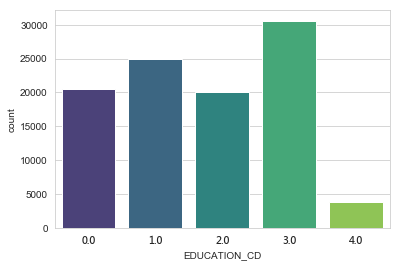

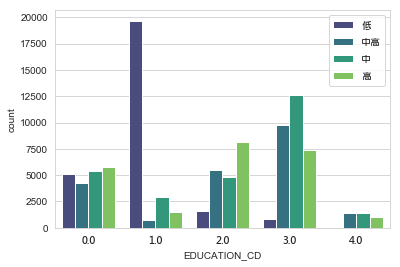

-------------------------------
0.0:
高     5776
中     5426
低     5109
中高    4251
Name: AGE, dtype: int64
中(%): 26.388483610543723
中高(%): 20.67405894368252
低(%): 24.8468047855267
高(%): 28.090652660247056
-------------------------------
1.0:
低     19668
中      2886
高      1540
中高      779
Name: AGE, dtype: int64
中(%): 11.60294295018695
中高(%): 3.1319101033248904
低(%): 79.07369436738632
高(%): 6.1914525791018376
-------------------------------
2.0:
高     8194
中高    5520
中     4804
低     1602
Name: AGE, dtype: int64
中(%): 23.876739562624255
中高(%): 27.435387673956264
低(%): 7.962226640159045
高(%): 40.72564612326044
-------------------------------
3.0:
中     12647
中高     9743
高      7389
低       807
Name: AGE, dtype: int64
中(%): 41.34898319492578
中高(%): 31.85444320931145
低(%): 2.6384620414568754
高(%): 24.15811155430589
-------------------------------
4.0:
中高    1444
中     1385
高     1003
低       27
Name: AGE, dtype: int64
中(%): 35.89012697590049
中高(%): 37.419020471624776
低(%): 0.699663125161959

In [11]:
# 4為最少的類別，推測為研究所。1推測為國中以下(現在年齡只要未到大學，就算是高中在學一般也算在國中以下)，因為有很多低年齡者
count_and_percent("EDUCATION_CD", train_v1, "AGE")

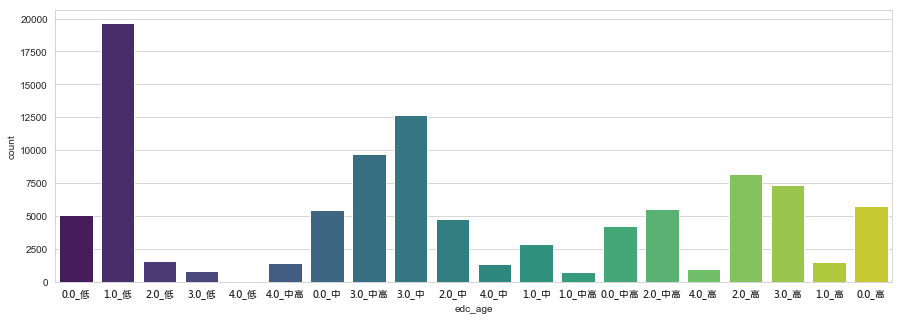

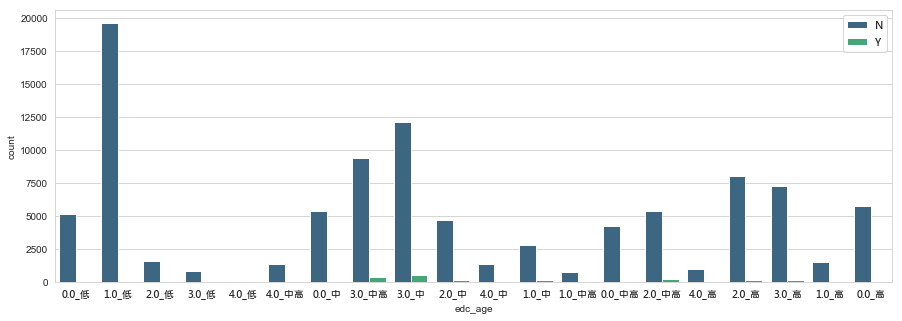

-------------------------------
0.0_低:
N    5104
Y       5
Name: Y1, dtype: int64
N(%): 99.90213348991975
Y(%): 0.09786651008025053
-------------------------------
1.0_低:
N    19625
Y       43
Name: Y1, dtype: int64
N(%): 99.78137075452511
Y(%): 0.21862924547488305
-------------------------------
2.0_低:
N    1577
Y      25
Name: Y1, dtype: int64
N(%): 98.43945068664169
Y(%): 1.5605493133583022
-------------------------------
3.0_低:
N    792
Y     15
Name: Y1, dtype: int64
N(%): 98.14126394052045
Y(%): 1.858736059479554
-------------------------------
4.0_低:
N    27
Name: Y1, dtype: int64
N(%): 100.0
-------------------------------
4.0_中高:
N    1366
Y      78
Name: Y1, dtype: int64
N(%): 94.5983379501385
Y(%): 5.401662049861495
-------------------------------
0.0_中:
N    5351
Y      75
Name: Y1, dtype: int64
N(%): 98.61776631035754
Y(%): 1.382233689642462
-------------------------------
3.0_中高:
N    9414
Y     329
Name: Y1, dtype: int64
N(%): 96.6232166683773
Y(%): 3.3767833316227036
--

In [37]:
train_v1["edc_age"] = train_v1["EDUCATION_CD"].apply(str) + "_" + train_v1["AGE"]
count_and_percent("edc_age", train_v1, "Y1", [15, 5])

In [38]:
# pivot table
piv_tem= train_v1.pivot_table(values="Y", index="EDUCATION_CD", columns="AGE", aggfunc=sum)
piv_edu_age = piv_tem[["低", "中", "中高", "高"]]

Text(0.5, 1.0, 'Y numbers of Categories of EDU & AGE')

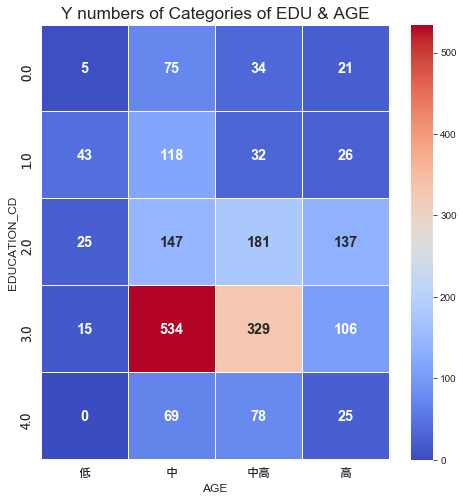

In [39]:
# 3-中 和 3-中高 有著特別高的Y數量=>且經上表確認此二類非少數類別
# 從比例來看也有類似現象(由於EDU和AGE各類別比例相對平均，所以可以這樣看)
# 但要注意的是EDU所代表的只有約80000筆資料性質

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_edu_age, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt="d",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)
plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)
ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("EDUCATION_CD", size = "large")
plt.title("Y numbers of Categories of EDU & AGE", fontdict={"fontsize":"xx-large"})

In [40]:
# pivot table
piv_tem_test= train_v1.pivot_table(values="Y", index="EDUCATION_CD", columns="AGE", aggfunc=agg_fun1)
piv_edu_age_rat = piv_tem_test[["低", "中", "中高", "高"]]

Text(0.5, 1.0, 'Y Percentages of Categories of EDU & AGE')

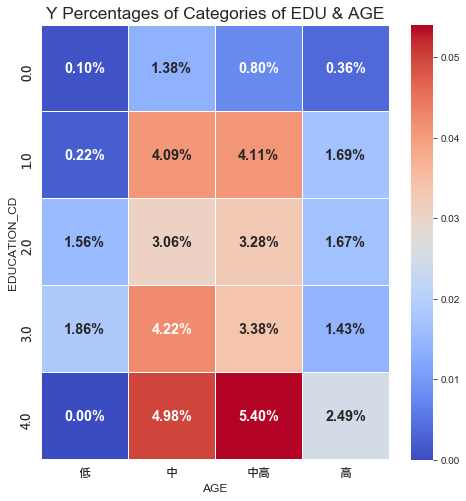

In [41]:

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_edu_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)
plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)
ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("EDUCATION_CD", size = "large")
plt.title("Y Percentages of Categories of EDU & AGE", fontdict={"fontsize":"xx-large"})

#### (9-3) 三個基本資料遺失值特徵 & AGE (需先執行(7)step1程式)(此於train_v1觀察)

In [48]:
train_v1["if_basic_nan_1"] = train_v2["if_basic_nan_1"]
train_v1["if_basic_nan_2"] = train_v2["if_basic_nan_2"]
train_v1["if_basic_nan"] = train_v2["if_basic_nan"]

Text(52.0, 0.5, 'if_basic_nan_1')

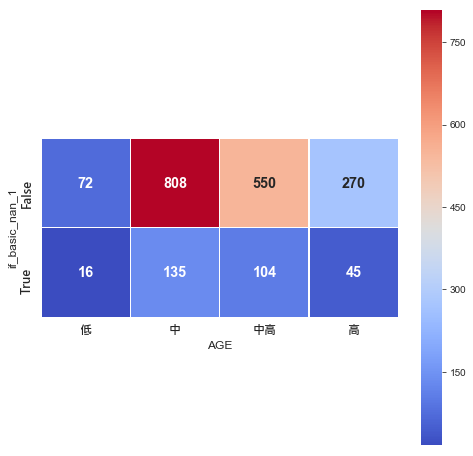

In [49]:
# 這裡的基本資料NaN和AGE還有EDUCATION都很強的分別出Y=>覺得NAN有它的意義在
piv_tem1 = train_v1.pivot_table(values="Y", index="if_basic_nan_1", columns="AGE", aggfunc=sum)
piv_bna1_age = piv_tem1[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_bna1_age, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt="d",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)

plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("if_basic_nan_1", size = "large")


Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan_1 & AGE')

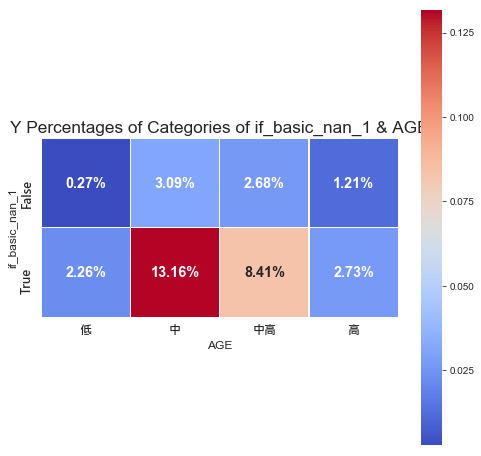

In [50]:
# pivot table
piv_tem = train_v1.pivot_table(values="Y", index="if_basic_nan_1", columns="AGE", aggfunc=agg_fun1)
piv_bna1_age_rat = piv_tem[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna1_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("if_basic_nan_1", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan_1 & AGE", fontdict={"fontsize":"xx-large"})



Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan_2 & AGE')

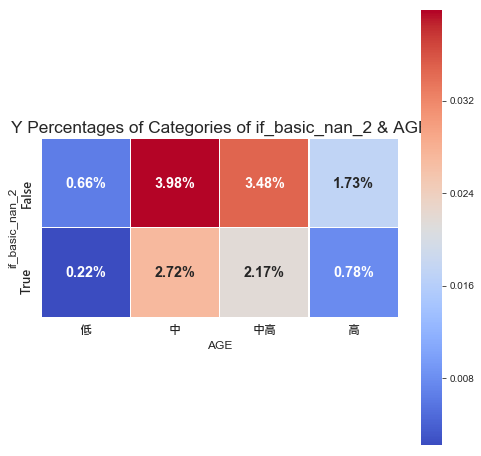

In [51]:
# pivot table
piv_tem = train_v1.pivot_table(values="Y", index="if_basic_nan_2", columns="AGE", aggfunc=agg_fun1)
piv_bna2_age_rat = piv_tem[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna2_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("if_basic_nan_2", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan_2 & AGE", fontdict={"fontsize":"xx-large"})


Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan & AGE')

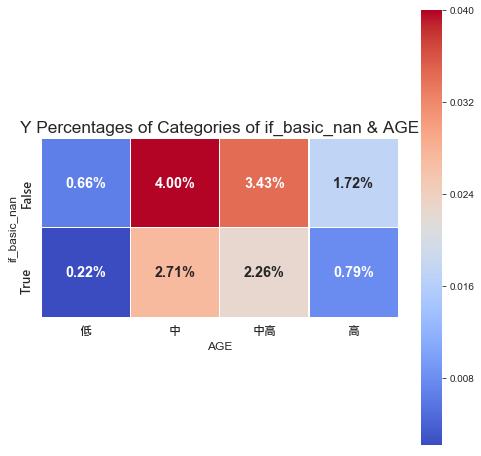

In [52]:
# pivot table
piv_tem = train_v1.pivot_table(values="Y", index="if_basic_nan", columns="AGE", aggfunc=agg_fun1)
piv_bna_age_rat = piv_tem[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("if_basic_nan", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan & AGE", fontdict={"fontsize":"xx-large"})


In [53]:
print("1:T,2")
print(train_v1[train_v1["if_basic_nan_1"] == True]["if_basic_nan_2"].value_counts())
print("--------------------")

print("1:F,2")
print(train_v1[train_v1["if_basic_nan_1"] == False]["if_basic_nan_2"].value_counts())
print("--------------------")

print("2:T,1")
print(train_v1[train_v1["if_basic_nan_2"] == True]["if_basic_nan_1"].value_counts())
print("--------------------")

print("2:F,1")
print(train_v1[train_v1["if_basic_nan_2"] == False]["if_basic_nan_1"].value_counts())


1:T,2
True     4281
False     337
Name: if_basic_nan_2, dtype: int64
--------------------
1:F,2
False    50050
True     45332
Name: if_basic_nan_2, dtype: int64
--------------------
2:T,1
False    45332
True      4281
Name: if_basic_nan_1, dtype: int64
--------------------
2:F,1
False    50050
True       337
Name: if_basic_nan_1, dtype: int64


#### (9-4)三個基本資料遺失值特徵 & EDUCATION_CD(教育程度) (於train_v1觀察)

Text(52.0, 0.5, 'if_basic_nan_1')

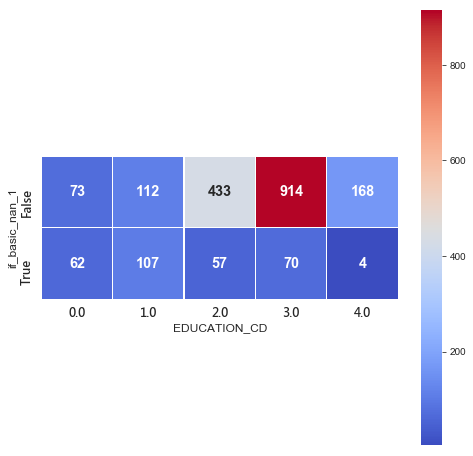

In [54]:
piv_bna1_edu = train_v1.pivot_table(values="Y", index="if_basic_nan_1", columns="EDUCATION_CD", aggfunc=sum)

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_bna1_edu, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt="d",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)

plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("if_basic_nan_1", size = "large")

Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan1 & EDU')

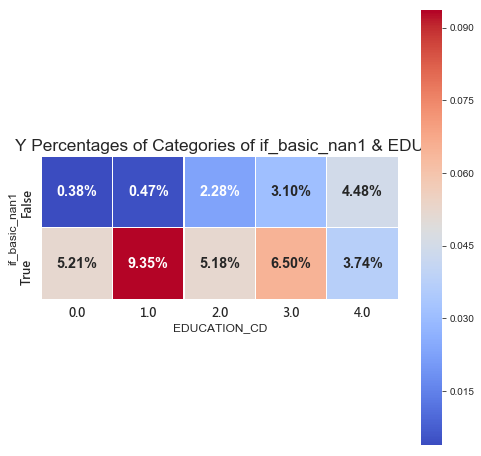

In [55]:
# pivot table
piv_bna1_edu_rat = train_v1.pivot_table(values="Y", index="if_basic_nan_1", columns="EDUCATION_CD", aggfunc=agg_fun1)

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna1_edu_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("if_basic_nan1", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan1 & EDU", fontdict={"fontsize":"xx-large"})

Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan2 & EDU')

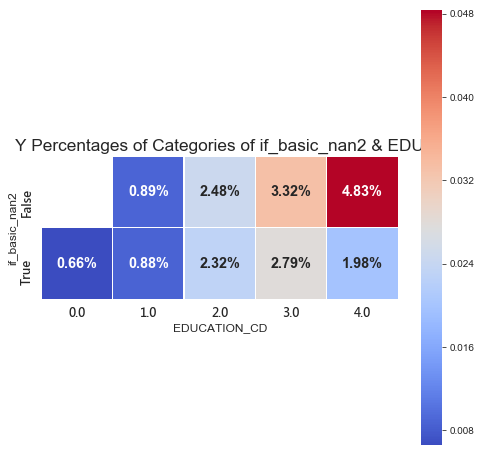

In [56]:
# pivot table
piv_bna2_edu_rat = train_v1.pivot_table(values="Y", index="if_basic_nan_2", columns="EDUCATION_CD", aggfunc=agg_fun1)

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna2_edu_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("if_basic_nan2", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan2 & EDU", fontdict={"fontsize":"xx-large"})

Text(0.5, 1.0, 'Y Percentages of Categories of if_basic_nan & EDU')

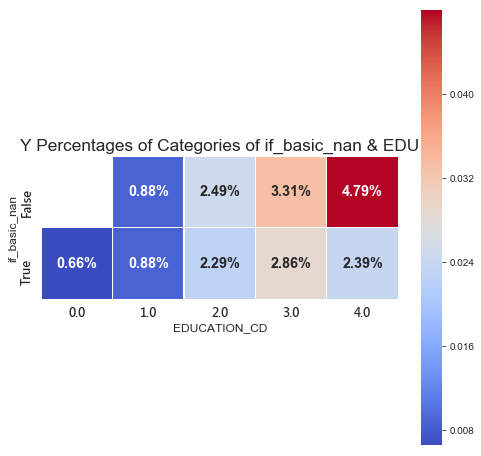

In [57]:
# pivot table
piv_bna_edu_rat = train_v1.pivot_table(values="Y", index="if_basic_nan", columns="EDUCATION_CD", aggfunc=agg_fun1)

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_bna_edu_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("if_basic_nan", size = "large")

plt.title("Y Percentages of Categories of if_basic_nan & EDU", fontdict={"fontsize":"xx-large"})

# (10) Two Features:CHANNEL_A_POL_CNT(透過A通路投保新契約件數) & B
(於train_v2、train分析)
* 基本資料有缺值者仍有透過A、B通路投保新契約(所以不能因為基本資料缺值就推測為沒有買保險、純諮詢的客戶)
* 此二欄位沒有遺失值
* 有買重疾險的人透過通路B投保的新契約數都比較少。但由於大多數此欄位皆為0次，所以購買B通路新契約次數多的為極少數(大概剩不到100人從單一欄位分配圖來看，是可以明顯區分YN的)。
* 通路A欄位的分配圖YN無太大分別。
* 單純從此二欄位來看，皆無法有太大的分類效果(可考慮刪欄位)。


In [58]:
# 移動到要分析的資料集
train_v2["CHANNEL_A_POL_CNT"] = train["CHANNEL_A_POL_CNT"]
train_v2["CHANNEL_B_POL_CNT"] = train["CHANNEL_B_POL_CNT"]

In [60]:
# 基本資料有缺值者仍有透過A通路投保新契約(所以不能因為基本資料缺值就推測為沒有買保險、純諮詢的客戶)
train_v2[train_v2["if_basic_nan_1"] == True]["CHANNEL_A_POL_CNT"].value_counts()

0     2232
1      951
2      648
3      294
4      190
5       89
6       71
7       40
8       29
9       18
11      11
12      11
10      10
13       4
15       3
16       3
18       3
17       2
14       2
29       2
27       1
20       1
68       1
26       1
21       1
Name: CHANNEL_A_POL_CNT, dtype: int64

In [61]:
train_v2[train_v2["if_basic_nan_1"] == True]["CHANNEL_B_POL_CNT"].value_counts()

0    4598
1      16
2       3
3       1
Name: CHANNEL_B_POL_CNT, dtype: int64

In [66]:
#遺失值狀況(沒有)
print(len(train_v2[train_v2["CHANNEL_A_POL_CNT"].isnull()]))
print(len(train_v2[train_v2["CHANNEL_B_POL_CNT"].isnull()]))

0
0


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


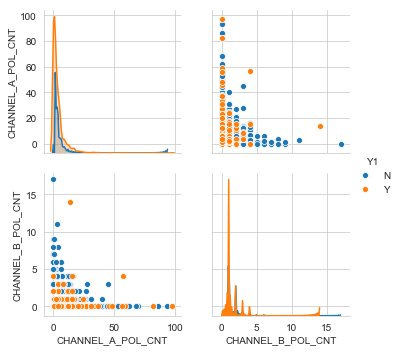

In [72]:
# Y出現在channel B較少的地方
sns.pairplot(train[["CHANNEL_A_POL_CNT", "CHANNEL_B_POL_CNT", "Y1"]], hue="Y1")

In [82]:
# channelB多為0
train["CHANNEL_B_POL_CNT"].value_counts()

0     97915
1      1480
2       382
3       128
4        55
5        18
6        11
7         4
9         2
8         2
17        1
14        1
11        1
Name: CHANNEL_B_POL_CNT, dtype: int64

In [85]:
# channelA有較多非0次數
train["CHANNEL_A_POL_CNT"].value_counts().head(10)

0    55427
1    14116
2     9664
3     6174
4     4089
5     2560
6     1929
7     1345
8     1010
9      740
Name: CHANNEL_A_POL_CNT, dtype: int64

# (11) One feature:MARRIAGE_CD(婚姻狀況)
* 推測:0:未婚；1:已婚；2:離婚or喪偶(根據婚姻狀況欄位長條圖人數、婚姻狀況年齡長條圖、國泰人壽保單生調表填寫表單推測)
* 婚姻狀況1已婚、2離婚，有較高的y比=>跟年齡可能有很高的相關性。另外，已婚可能因為家庭責任等因素影響。
 
* 注意:由於2類別為少數類別，因此比例高的現象可能不一定是真實的現象。



In [88]:
print("遺失值數量:", sum(train["MARRIAGE_CD"].isnull()))

遺失值數量: 7951


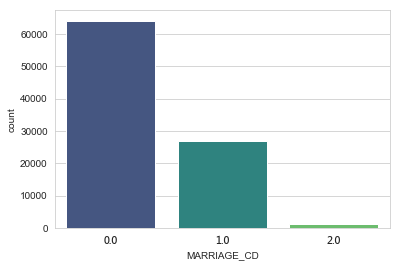

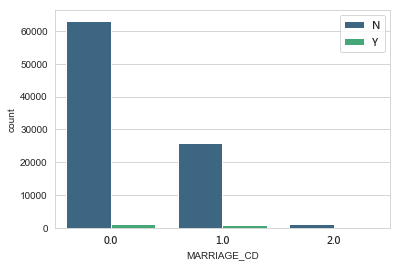

-------------------------------
nan:
N    7872
Y      79
Name: Y1, dtype: int64
N(%): 99.006414287511
Y(%): 0.993585712488995
-------------------------------
0.0:
N    63092
Y     1035
Name: Y1, dtype: int64
N(%): 98.38601525098632
Y(%): 1.613984749013676
-------------------------------
1.0:
N    25982
Y      840
Name: Y1, dtype: int64
N(%): 96.86824248751024
Y(%): 3.1317575124897474
-------------------------------
2.0:
N    1054
Y      46
Name: Y1, dtype: int64
N(%): 95.81818181818181
Y(%): 4.181818181818182


In [89]:
count_and_percent("MARRIAGE_CD", train, "Y1")

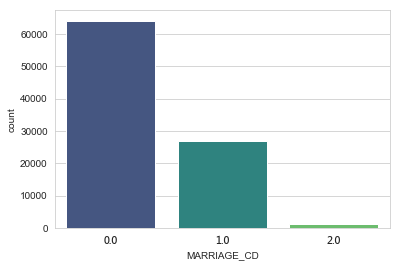

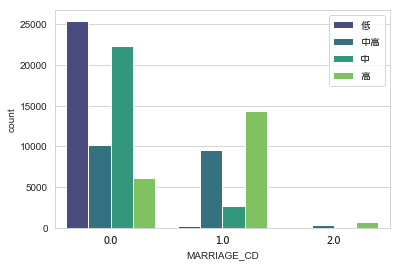

-------------------------------
nan:
高     2766
中     2060
中高    1624
低     1501
Name: AGE, dtype: int64
中(%): 25.9086907307257
中高(%): 20.42510376053327
低(%): 18.878128537290905
高(%): 34.78807697145013
-------------------------------
0.0:
低     25465
中     22376
中高    10145
高      6141
Name: AGE, dtype: int64
中(%): 34.89325868978745
中高(%): 15.82016935144323
低(%): 39.71026244795484
高(%): 9.576309510814477
-------------------------------
1.0:
高     14328
中高     9614
中      2637
低       243
Name: AGE, dtype: int64
中(%): 9.831481619566027
中高(%): 35.843710386995745
低(%): 0.9059727089702483
高(%): 53.41883528446797
-------------------------------
2.0:
高     667
中高    354
中      75
低       4
Name: AGE, dtype: int64
中(%): 6.8181818181818175
中高(%): 32.18181818181819
低(%): 0.36363636363636365
高(%): 60.63636363636363


In [228]:
# 推測:0:未婚；1:已婚；2:離婚or喪偶
count_and_percent("MARRIAGE_CD", train, "AGE")

# (12) Three Features: MARRIAGE_CD & AGE & EDUCATION_CD

Text(52.0, 0.5, 'MARRIAGE_CD')

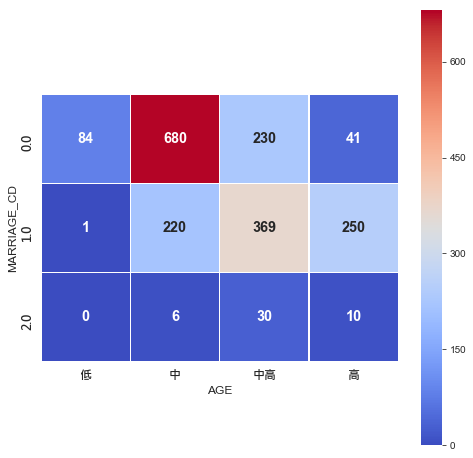

In [230]:
# MAR比例不平均，這樣看可能就有偏差 =>用比例看比較正確
piv_tem3 = train_v1.pivot_table(values="Y", index="MARRIAGE_CD", columns="AGE", aggfunc=sum)
piv_ma_age = piv_tem3[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_ma_age, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt="d",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)

plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("MARRIAGE_CD", size = "large")


Text(52.0, 0.5, 'MARRIAGE_CD')

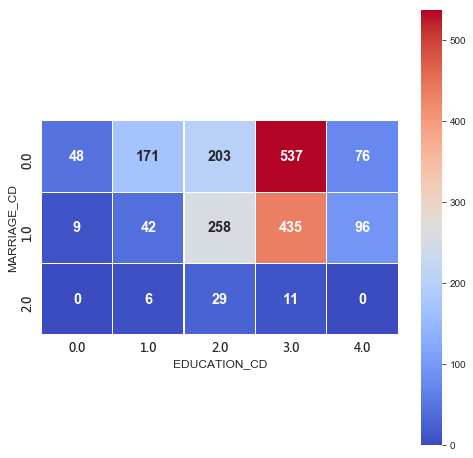

In [231]:
piv_ma_edu = train_v1.pivot_table(values="Y", index="MARRIAGE_CD", columns="EDUCATION_CD", aggfunc=sum)

plt.figure(figsize=[8, 8])
ax = sns.heatmap(piv_ma_edu, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt="d",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)

plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("MARRIAGE_CD", size = "large")


Text(0.5, 1.0, 'Y Percentages of Categories of MARRIAGE_CD & AGE')

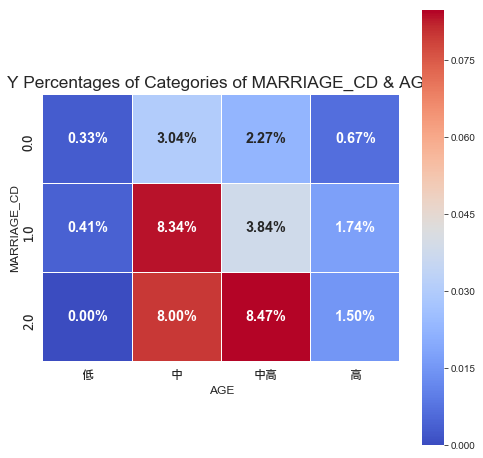

In [232]:
piv_tem = train_v1.pivot_table(values="Y", index="MARRIAGE_CD", columns="AGE", aggfunc=agg_fun1)
piv_ma_age_rat = piv_tem[["低", "中", "中高", "高"]]

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_ma_age_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("AGE", size = "large")
ax.set_ylabel("MARRIAGE_CD", size = "large")

plt.title("Y Percentages of Categories of MARRIAGE_CD & AGE", fontdict={"fontsize":"xx-large"})

Text(0.5, 1.0, 'Y Percentages of Categories of MARRIAGE_CD & EDUCATION_CD')

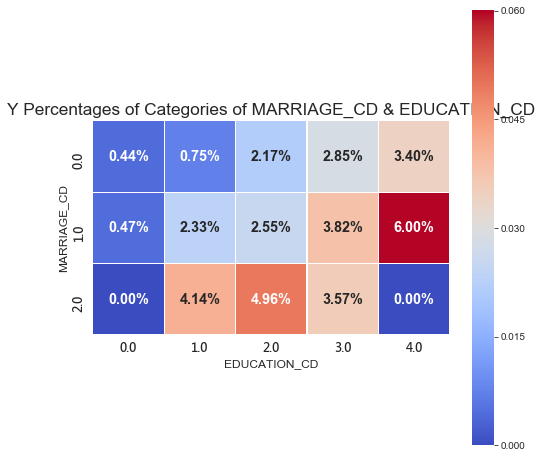

In [233]:
piv_ma_edu_rat = train_v1.pivot_table(values="Y", index="MARRIAGE_CD", columns="EDUCATION_CD", aggfunc=agg_fun1)

plt.figure(figsize=[8, 8])

ax = sns.heatmap(piv_ma_edu_rat, cmap="coolwarm", linewidths=0.2, linecolor="w", annot=True, fmt=".2%",
            annot_kws={"weight": "bold", "size": "x-large"}, square=True)


plt.xticks(fontproperties=font_kibig)
plt.yticks(fontproperties=font_kibig)

ax.set_xlabel("EDUCATION_CD", size = "large")
ax.set_ylabel("MARRIAGE_CD", size = "large")

plt.title("Y Percentages of Categories of MARRIAGE_CD & EDUCATION_CD", fontdict={"fontsize":"xx-large"})

# (13)ILL_ACCELERATION_AMT 當年度保障_重大疾病提前給付(神秘轉換&歸一化)
# & ILL_ADDITIONAL_AMT 當年度保障_重大疾病額外給付 (神秘轉換&歸一化) 
* 二欄位遺失值皆為"同樣的"27540筆資料
* 原則上這兩個欄位如果不是0的話，應該代表客戶原先就有買重疾險(但有神秘轉換過，不確定非0數會不會被轉成0)
* 若上述推斷正確，則從NY比例可以看出，有重疾險的人，後續可能不太會再買(仍可能會同一商品追加投保)

In [93]:
print("遺失值數量(提前):", sum(train["ILL_ACCELERATION_AMT"].isnull()))
print("遺失值數量(額外):", sum(train["ILL_ADDITIONAL_AMT"].isnull()))

遺失值數量(提前): 27540
遺失值數量(額外): 27540


In [98]:
sum(train["ILL_ACCELERATION_AMT"].isnull() == train["ILL_ADDITIONAL_AMT"].isnull()) -100000

0

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 0.15)

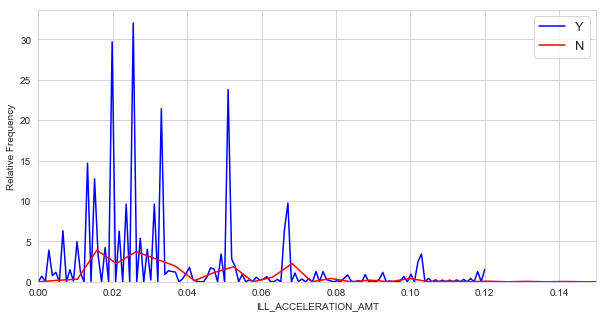

In [99]:

# 重大疾病提前給付 
plt.figure(figsize=(10, 5))
sns.distplot(train[train["Y1"] == "Y"]["ILL_ACCELERATION_AMT"], bins=30, kde=True, 
             hist=False, color="blue",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["ILL_ACCELERATION_AMT"], bins=30, kde=True, 
             hist=False, color="red", 
             label="N")
plt.legend(fontsize=13)
plt.ylabel("Relative Frequency")
plt.xlabel("ILL_ACCELERATION_AMT")
plt.xlim([0, 0.15])

In [110]:
# 有重疾險的人，後續可能不太會再買(仍可能會同一商品追加投保)
print("有重大疾病提前給付(不等於0):")
print(train[train["ILL_ACCELERATION_AMT"] != 0]["Y1"].value_counts())
print("Y(%):", 62900/(36481 + 629))
print("------------------------")
print("沒有重大疾病提前給付(等於0):")
print(train[train["ILL_ACCELERATION_AMT"] == 0]["Y1"].value_counts())
print("Y(%):", 137100/(61519 + 1371))
print("------------------------")
print("NaN:")
print(train[train["ILL_ACCELERATION_AMT"].isnull()]["Y1"].value_counts())
print("Y(%):", 33300/(27207 + 333))


有重大疾病提前給付(不等於0):
N    36481
Y      629
Name: Y1, dtype: int64
Y(%): 1.6949609269738615
------------------------
沒有重大疾病提前給付(等於0):
N    61519
Y     1371
Name: Y1, dtype: int64
Y(%): 2.179996819844172
------------------------
NaN:
N    27207
Y      333
Name: Y1, dtype: int64
Y(%): 1.2091503267973855


(0, 0.15)

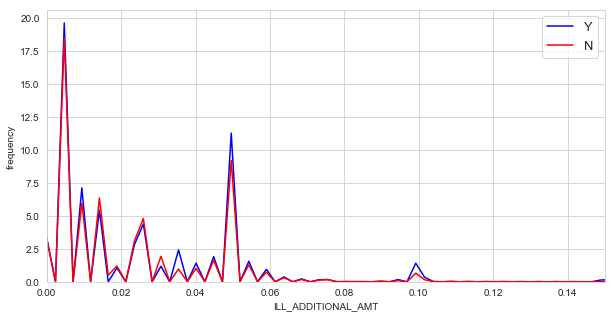

In [112]:
# 重大疾病額外給付，很特別=>分配幾乎一樣
plt.figure(figsize=(10, 5))
sns.distplot(train[train["Y1"] == "Y"]["ILL_ADDITIONAL_AMT"], bins=30, kde=True, 
             hist=False, color="blue",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["ILL_ADDITIONAL_AMT"], bins=30, kde=True, 
             hist=False, color="red", 
             label="N")
plt.legend(fontsize=13)
plt.ylabel("frequency")
plt.xlabel("ILL_ADDITIONAL_AMT")
plt.xlim([0, 0.15])

In [298]:
print("有重大疾病額外給付(不等於0):")
print(train[train["ILL_ADDITIONAL_AMT"] != 0]["Y1"].value_counts())
print("Y(%):", 50800/(34109 + 508))
print("------------------------")
print("沒有重大疾病額外給付(等於0):")
print(train[train["ILL_ADDITIONAL_AMT"] == 0]["Y1"].value_counts())
print("Y(%):", 149200/(63891 + 1492))
print("------------------------")
print("NaN:")
print(train[train["ILL_ADDITIONAL_AMT"].isnull()]["Y1"].value_counts())
print("Y(%):", 33300/(27207 + 333))


有重大疾病額外給付(不等於0):
N    34109
Y      508
Name: Y1, dtype: int64
Y(%): 1.4674870728254903
------------------------
沒有重大疾病額外給付(等於0):
N    63891
Y     1492
Name: Y1, dtype: int64
Y(%): 2.2819387302509826
------------------------
NaN:
N    27207
Y      333
Name: Y1, dtype: int64
Y(%): 1.2091503267973855


### 延伸觀察(暫不做)
1. 額外給付NY分配非常相近

# (14)與ABC通路相關欄位 (不小心規劃太多做不完，後續暫時不做解釋、延伸)

In [300]:

print("和A通路有關欄位(非計量):")

print("-------------------")
print("近3年通過A通路購買新契約:")

print(train["LAST_A_ISSUE_DT"].value_counts())

print("-------------------")

print("近3年通過A通路聯繫:")
print(train["LAST_A_CCONTACT_DT"].value_counts())


和A通路有關欄位(非計量):
-------------------
近3年通過A通路購買新契約:
N    88631
Y    11369
Name: LAST_A_ISSUE_DT, dtype: int64
-------------------
近3年通過A通路聯繫:
N    64595
Y    35405
Name: LAST_A_CCONTACT_DT, dtype: int64


In [301]:
print("和B通路有關欄位(非計量):")
print("-------------------")

print("近3年通過B通路購買新契約:")
print(train["LAST_B_ISSUE_DT"].value_counts())

和B通路有關欄位(非計量):
-------------------
近3年通過B通路購買新契約:
N    99453
Y      547
Name: LAST_B_ISSUE_DT, dtype: int64


In [302]:
print("和C通路有關欄位(非計量):")
print("-------------------")

print("近三年是否有到 C 通路申辦服務:")
print(train["LAST_C_DT"].value_counts())

和C通路有關欄位(非計量):
-------------------
近三年是否有到 C 通路申辦服務:
N    82299
Y    17701
Name: LAST_C_DT, dtype: int64


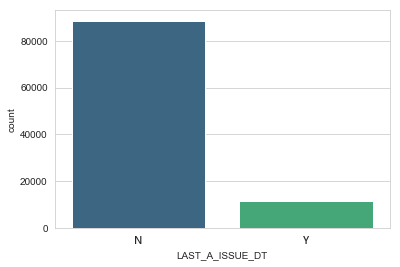

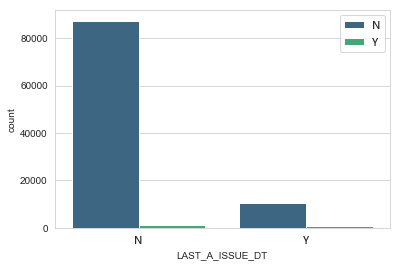

-------------------------------
N:
N    87403
Y     1228
Name: Y1, dtype: int64
N(%): 98.61448026085681
Y(%): 1.3855197391431893
-------------------------------
Y:
N    10597
Y      772
Name: Y1, dtype: int64
N(%): 93.20960506640866
Y(%): 6.790394933591346


In [303]:
# 近3年通過A通路購買新契約 =>代表有一定財務能力，且有保險觀念
count_and_percent("LAST_A_ISSUE_DT", train, "Y1")

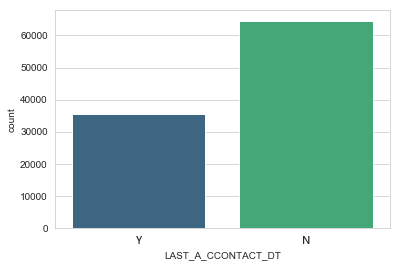

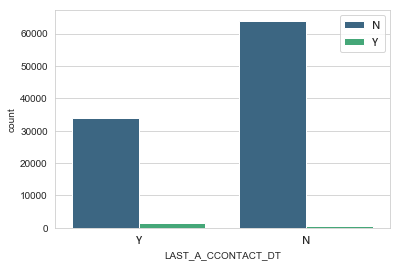

-------------------------------
Y:
N    34010
Y     1395
Name: Y1, dtype: int64
N(%): 96.05987854822764
Y(%): 3.9401214517723484
-------------------------------
N:
N    63990
Y      605
Name: Y1, dtype: int64
N(%): 99.06339499961298
Y(%): 0.936605000387027


In [304]:
# 近3年通過A通路接觸=>有的人代表有意願購買保險
count_and_percent("LAST_A_CCONTACT_DT", train, "Y1")

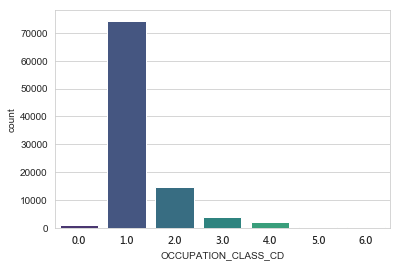

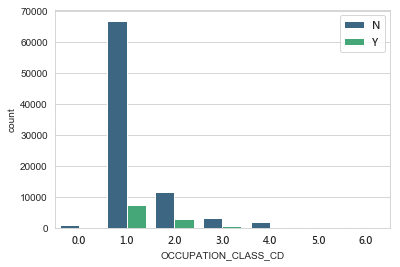

-------------------------------
1.0:
N    66930
Y     7442
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 89.99354595815629
Y(%): 10.006454041843703
-------------------------------
nan:
N    3957
Y       3
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 99.92424242424242
Y(%): 0.07575757575757576
-------------------------------
2.0:
N    11605
Y     2912
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 79.94075911000895
Y(%): 20.059240889991045
-------------------------------
3.0:
N    3182
Y     645
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 83.14606741573034
Y(%): 16.853932584269664
-------------------------------
5.0:
N    192
Y     34
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 84.95575221238938
Y(%): 15.04424778761062
-------------------------------
4.0:
N    1733
Y     292
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 85.58024691358025
Y(%): 14.419753086419753
-------------------------------
6.0:
N    171
Y     31
Name: LAST_A_ISSUE_DT, dtype: int64
N(%): 84.65346534653465
Y(%): 15.346534653465346
------

In [305]:
count_and_percent("OCCUPATION_CLASS_CD", train, "LAST_A_ISSUE_DT")

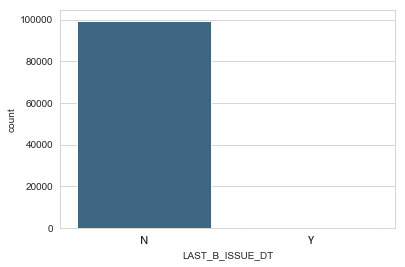

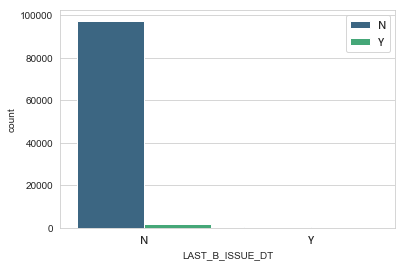

-------------------------------
N:
N    97472
Y     1981
Name: Y1, dtype: int64
N(%): 98.00810433068887
Y(%): 1.991895669311132
-------------------------------
Y:
N    528
Y     19
Name: Y1, dtype: int64
N(%): 96.52650822669105
Y(%): 3.473491773308958


In [306]:
# B通路此現象不顯著=>有透過B通路買新契約數過少
count_and_percent("LAST_B_ISSUE_DT", train, "Y1")

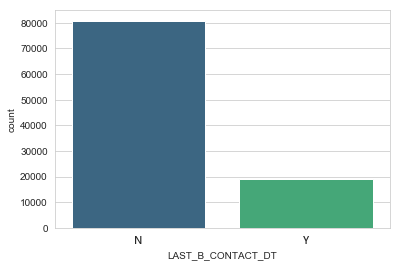

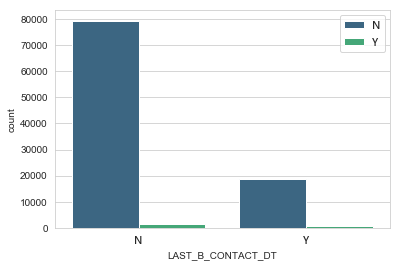

-------------------------------
N:
N    79391
Y     1421
Name: Y1, dtype: int64
N(%): 98.24159778250755
Y(%): 1.7584022174924516
-------------------------------
Y:
N    18609
Y      579
Name: Y1, dtype: int64
N(%): 96.98248905565978
Y(%): 3.017510944340213


In [382]:
count_and_percent("LAST_B_CONTACT_DT", train, "Y1")

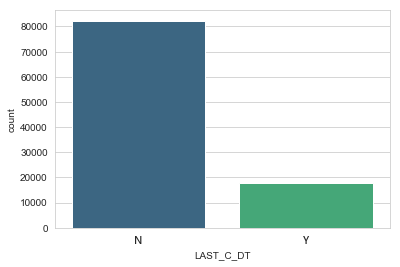

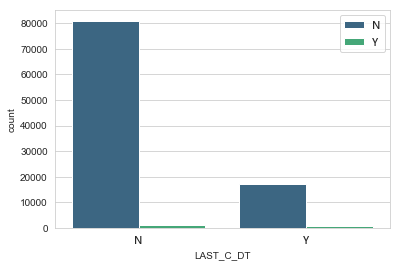

-------------------------------
N:
N    81039
Y     1260
Name: Y1, dtype: int64
N(%): 98.46899719316153
Y(%): 1.5310028068384793
-------------------------------
Y:
N    16961
Y      740
Name: Y1, dtype: int64
N(%): 95.8194452290831
Y(%): 4.180554770916897


In [307]:
# 近三年是否有到 C 通路申辦服務
count_and_percent("LAST_C_DT", train, "Y1")

In [308]:
train["L1YR_A_ISSUE_CNT"].value_counts()

0     93490
1      3639
2      1603
3       695
4       332
5       114
6        52
7        23
8        18
9        15
10        7
12        6
15        2
16        1
13        1
14        1
22        1
Name: L1YR_A_ISSUE_CNT, dtype: int64

In [309]:
train["L1YR_B_ISSUE_CNT"].value_counts()

0    99691
1      289
2       17
3        2
4        1
Name: L1YR_B_ISSUE_CNT, dtype: int64

In [310]:
train["CHANNEL_A_POL_CNT"].value_counts()

0     55427
1     14116
2      9664
3      6174
4      4089
5      2560
6      1929
7      1345
8      1010
9       740
10      579
11      398
12      364
13      255
14      201
15      165
16      148
17      135
18       93
19       80
20       73
21       62
22       46
23       44
24       39
25       32
26       29
28       26
27       25
29       17
      ...  
33        8
32        8
40        7
38        5
50        4
48        4
46        4
42        4
52        3
53        3
44        3
41        3
61        3
39        2
43        2
59        2
58        2
57        2
68        2
55        2
54        2
82        2
62        2
93        1
69        1
97        1
86        1
56        1
36        1
45        1
Name: CHANNEL_A_POL_CNT, Length: 65, dtype: int64

In [311]:
train["CHANNEL_B_POL_CNT"].value_counts()

0     97915
1      1480
2       382
3       128
4        55
5        18
6        11
7         4
9         2
8         2
17        1
14        1
11        1
Name: CHANNEL_B_POL_CNT, dtype: int64

(0, 20)

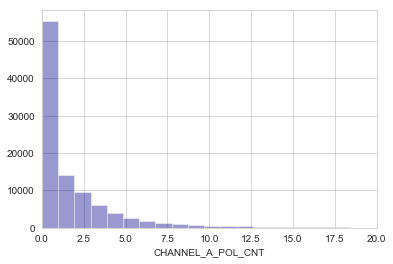

In [329]:
sns.distplot(train["CHANNEL_A_POL_CNT"], color="darkblue", kde=False, bins=100)
plt.xlim([0, 20])

(0, 500)

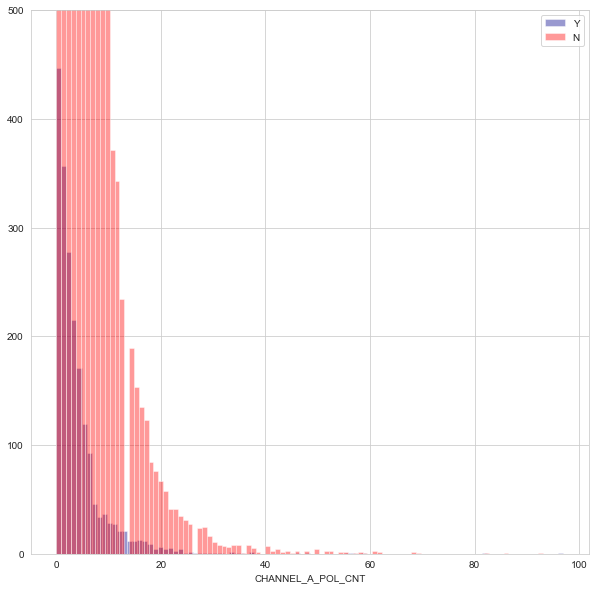

In [341]:
plt.figure(figsize=[10, 10])
sns.distplot(train[train["Y1"] == "Y"]["CHANNEL_A_POL_CNT"], color="darkblue", kde=False, bins=100, label="Y")

sns.distplot(train[train["Y1"] == "N"]["CHANNEL_A_POL_CNT"], color="red", kde=False, bins=100, label="N")

plt.legend()
plt.ylim([0, 500])

(0, 2.5)

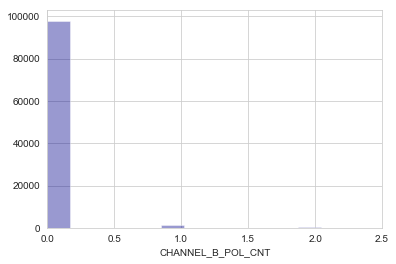

In [328]:
sns.distplot(train["CHANNEL_B_POL_CNT"], color="darkblue", kde=False, bins=100)
plt.xlim([0, 2.5])

(0, 3000)

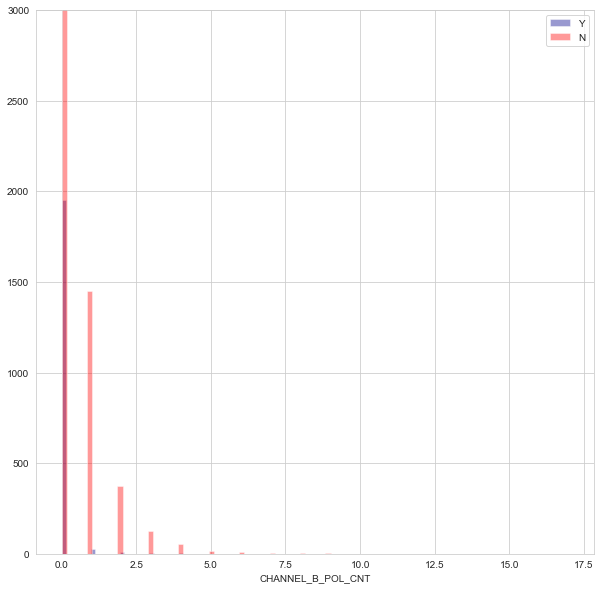

In [347]:
plt.figure(figsize=[10, 10])
sns.distplot(train[train["Y1"] == "Y"]["CHANNEL_B_POL_CNT"], color="darkblue", kde=False, bins=100, label="Y")

sns.distplot(train[train["Y1"] == "N"]["CHANNEL_B_POL_CNT"], color="red", kde=False, bins=100, label="N")

plt.legend()
plt.ylim([0, 3000])

In [314]:
# 若LAST_A_ISSUE_DT為N 則L1YR_A_ISSUE_CNT為0
train[train["LAST_A_ISSUE_DT"] == "N"]["L1YR_A_ISSUE_CNT"].value_counts()

0    88631
Name: L1YR_A_ISSUE_CNT, dtype: int64

In [315]:
# 若LAST_B_ISSUE_DT為N 則L1YR_B_ISSUE_CNT為0
train[train["LAST_B_ISSUE_DT"] == "N"]["L1YR_B_ISSUE_CNT"].value_counts()

0    99453
Name: L1YR_B_ISSUE_CNT, dtype: int64

In [316]:
# 近三年沒有和A接觸，卻有和A投保新契約(奇怪!!)=>接觸的定義?
train[train["LAST_A_CCONTACT_DT"] == "N"]["L1YR_A_ISSUE_CNT"].value_counts()

0    64586
1        9
Name: L1YR_A_ISSUE_CNT, dtype: int64

In [317]:
# use LAST_C_DT to fill some  L1YR_C_CNT
def clean_l1yr_c_cnt(cols):
    
    LAST_C_DT = cols[0]
    L1YR_C_CNT = cols[1]
    
    if pd.isnull(L1YR_C_CNT):
        if LAST_C_DT == "N":
            return 0
        
    
    return L1YR_C_CNT
    

In [263]:
train["L1YR_C_CNT"] = train[["LAST_C_DT", "L1YR_C_CNT"]].apply(clean_l1yr_c_cnt, axis=1)

In [264]:
# 近三年同時通過A、B通路投保新契約為少數
print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "Y")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "N")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "Y")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "N")]))

86
11283
461
88170


In [265]:
# 考慮c通路LAST_C_DT
# 只有C最多，其次AC同時，其次只有A...
print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "Y") & (train["LAST_C_DT"] == "Y")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "N") & (train["LAST_C_DT"] == "Y")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "Y") & (train["LAST_C_DT"] == "Y")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "N") & (train["LAST_C_DT"] == "Y")]))

print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "Y") & (train["LAST_C_DT"] == "N")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "Y") & (train["LAST_B_ISSUE_DT"] == "N") & (train["LAST_C_DT"] == "N")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "Y") & (train["LAST_C_DT"] == "N")]))
print(len(train[(train["LAST_A_ISSUE_DT"] == "N") & (train["LAST_B_ISSUE_DT"] == "N") & (train["LAST_C_DT"] == "N")]))

50
7133
151
10367
36
4150
310
77803


In [266]:
# 透過 A 通路投保新契約件數 >= 近一年透過 A 通路投保新契約次數 
train[train["CHANNEL_A_POL_CNT"] < train["L1YR_A_ISSUE_CNT"]]

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1


In [267]:
# 透過 B 通路投保新契約件數 >= 近一年透過 B 通路投保新契約次數 
train[train["CHANNEL_B_POL_CNT"] < train["L1YR_B_ISSUE_CNT"]]

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1


In [268]:
# 透過 AB 通路投保新契約件數是0，近三年沒有在c通路申辦服務=>則對應要保人數、對應被保險人數為0
print(train[(train["CHANNEL_A_POL_CNT"] == 0) & 
            (train["CHANNEL_B_POL_CNT"] == 0) & 
            (train["LAST_C_DT"] == 0)]["APC_CNT"].value_counts())

print(train[(train["CHANNEL_A_POL_CNT"] == 0) & 
            (train["CHANNEL_B_POL_CNT"] == 0) & 
            (train["LAST_C_DT"] == 0)]["INSD_CNT"].value_counts())



Series([], Name: APC_CNT, dtype: int64)
Series([], Name: INSD_CNT, dtype: int64)


(0, 5000)

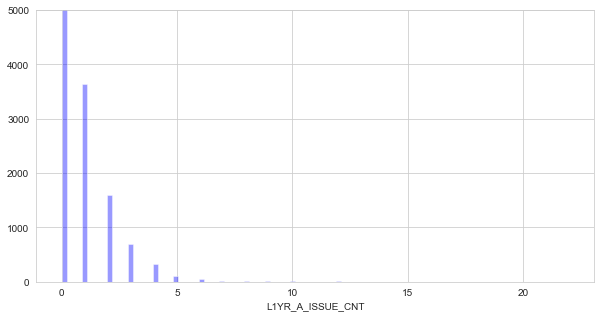

In [354]:
# 近一年透過 A 通路投保新契約次數
plt.figure(figsize=(10, 5))
sns.distplot(train["L1YR_A_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="blue")

plt.xlabel("L1YR_A_ISSUE_CNT")
plt.ylim([0, 5000])

(0, 5000)

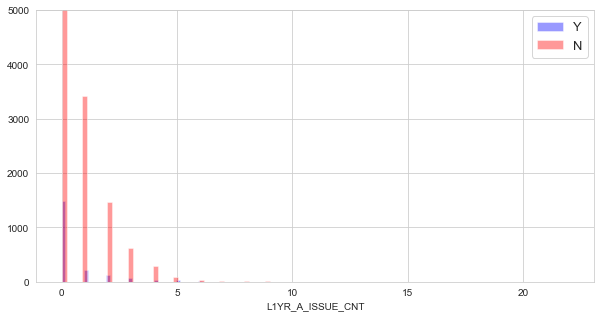

In [351]:
# 近一年透過 A 通路投保新契約次數
plt.figure(figsize=(10, 5))
sns.distplot(train[train["Y1"] == "Y"]["L1YR_A_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="blue",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["L1YR_A_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="red", 
             label="N")
plt.legend(fontsize=13)

plt.xlabel("L1YR_A_ISSUE_CNT")

plt.ylim([0, 5000])

(0, 5000)

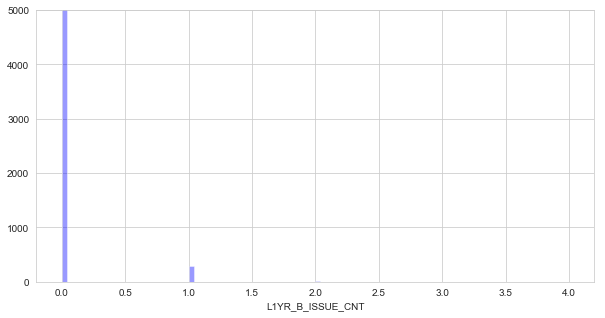

In [357]:
# 近一年透過 B通路投保新契約次數
plt.figure(figsize=(10, 5))
sns.distplot(train["L1YR_B_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="blue")

plt.xlabel("L1YR_B_ISSUE_CNT")
plt.ylim([0, 5000])

(0, 500)

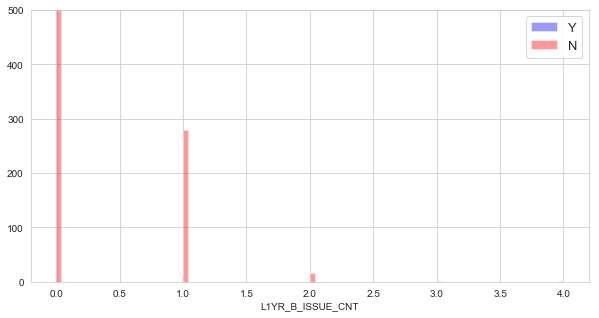

In [362]:
# 近一年透過 B 通路投保新契約次數
plt.figure(figsize=(10, 5))
sns.distplot(train[train["Y1"] == "Y"]["L1YR_B_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="blue",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["L1YR_B_ISSUE_CNT"], bins=100, kde=False, 
             hist=True, color="red", 
             label="N")
plt.legend(fontsize=13)

plt.xlabel("L1YR_B_ISSUE_CNT")

plt.ylim([0, 500])

# (15)相關性矩陣

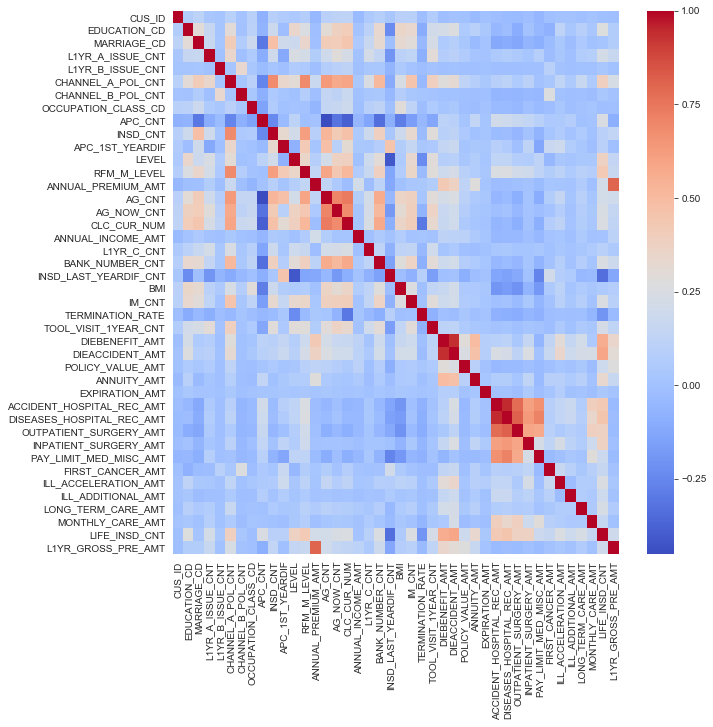

In [190]:
# 年繳化保費，近一年實繳保費相關性高
plt.figure(figsize=[10, 10])
sns.heatmap(train.corr(), cmap="coolwarm")

# (16)其他

In [270]:
# 特別少數不是0為第一位
train["APC_CNT"].value_counts()

1    52987
0    39610
2     7099
3      294
4       10
Name: APC_CNT, dtype: int64

Text(0.5, 0, 'APC_CNT')

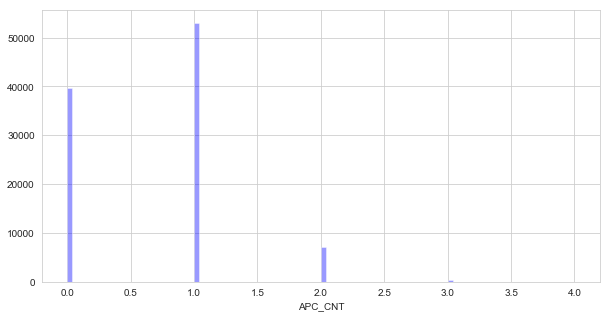

In [363]:
# 近一年透過 B通路投保新契約次數
plt.figure(figsize=(10, 5))
sns.distplot(train["APC_CNT"], bins=100, kde=False, 
             hist=True, color="blue")

plt.xlabel("APC_CNT")


Text(0.5, 0, 'APC_CNT')

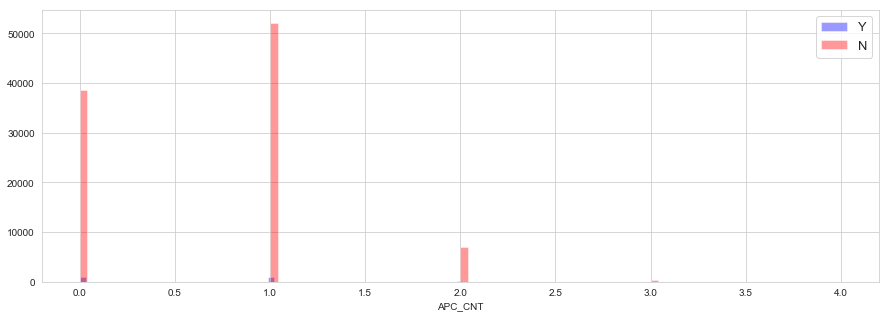

In [369]:
# 近一年透過 A 通路投保新契約次數
plt.figure(figsize=(15, 5))
sns.distplot(train[train["Y1"] == "Y"]["APC_CNT"], bins=100, kde=False, 
             hist=True, color="blue",
             label="Y")
sns.distplot(train[train["Y1"] == "N"]["APC_CNT"], bins=100, kde=False, 
             hist=True, color="red", 
             label="N")
plt.legend(fontsize=13)

plt.xlabel("APC_CNT")



In [271]:
train["INSD_CNT"].value_counts()

0     83858
1      8091
2      4907
3      2301
4       706
5       114
6        20
19        1
12        1
9         1
Name: INSD_CNT, dtype: int64

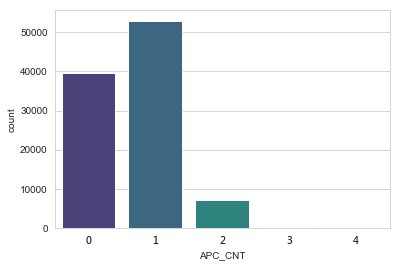

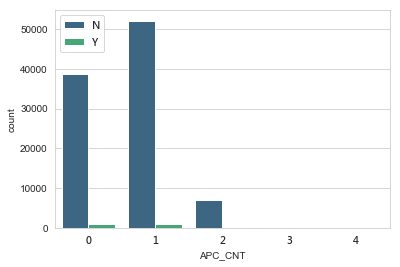

-------------------------------
0:
N    38619
Y      991
Name: Y1, dtype: int64
N(%): 97.49810653875284
Y(%): 2.50189346124716
-------------------------------
1:
N    52103
Y      884
Name: Y1, dtype: int64
N(%): 98.33166625776134
Y(%): 1.6683337422386622
-------------------------------
2:
N    6975
Y     124
Name: Y1, dtype: int64
N(%): 98.2532751091703
Y(%): 1.7467248908296942
-------------------------------
3:
N    293
Y      1
Name: Y1, dtype: int64
N(%): 99.65986394557824
Y(%): 0.3401360544217687
-------------------------------
4:
N    10
Name: Y1, dtype: int64
N(%): 100.0


In [272]:
# 對應的要保人數是0，卻有買重疾險(或許自己不算在"對應")(有對應的人，代表可以是他人買重疾險，而非自己)
count_and_percent("APC_CNT", train, "Y1")

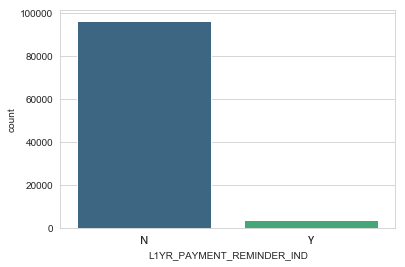

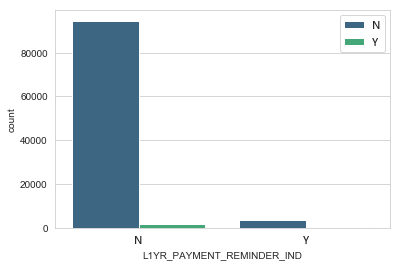

-------------------------------
N:
N    94617
Y     1855
Name: Y1, dtype: int64
N(%): 98.07716228542996
Y(%): 1.9228377145700308
-------------------------------
Y:
N    3383
Y     145
Name: Y1, dtype: int64
N(%): 95.89002267573696
Y(%): 4.109977324263038


In [273]:
# 一年內是否催繳
count_and_percent("L1YR_PAYMENT_REMINDER_IND", train, "Y1")

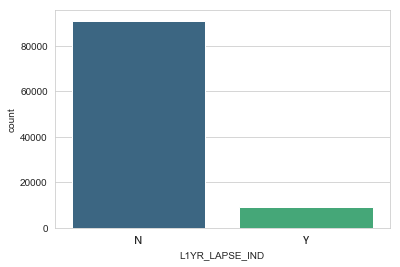

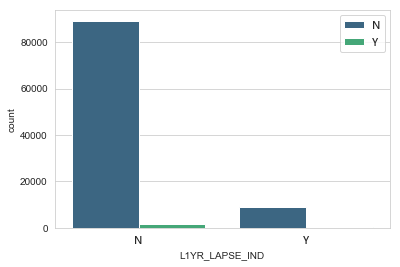

-------------------------------
N:
N    89233
Y     1790
Name: Y1, dtype: int64
N(%): 98.03346406952089
Y(%): 1.9665359304791095
-------------------------------
Y:
N    8767
Y     210
Name: Y1, dtype: int64
N(%): 97.6606884259775
Y(%): 2.339311574022502


In [274]:
# 一年內是否停效
count_and_percent("L1YR_LAPSE_IND", train, "Y1")

In [287]:
# 邏輯正確
train[train["AG_CNT"] < train["AG_NOW_CNT"]]

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1


In [371]:
train["AG_CNT"].value_counts()

0     43314
1     32822
2     14150
3      5706
4      2335
5       956
6       392
7       170
8        79
9        26
10       24
11       11
12        6
16        3
13        2
18        2
14        1
15        1
Name: AG_CNT, dtype: int64

In [372]:
train["AG_NOW_CNT"].value_counts()

0     64719
1     27099
2      6452
3      1363
4       293
5        52
6        16
7         3
8         2
10        1
Name: AG_NOW_CNT, dtype: int64

In [374]:
# 業務員人數為0的A通路投保新契約數不一定是0 =>無法下結論
train[train["AG_CNT"] == 0]["CHANNEL_A_POL_CNT"].value_counts()

0    43303
1       11
Name: CHANNEL_A_POL_CNT, dtype: int64

In [378]:
train["CHANNEL_A_POL_CNT"].value_counts()

0     55427
1     14116
2      9664
3      6174
4      4089
5      2560
6      1929
7      1345
8      1010
9       740
10      579
11      398
12      364
13      255
14      201
15      165
16      148
17      135
18       93
19       80
20       73
21       62
22       46
23       44
24       39
25       32
26       29
28       26
27       25
29       17
      ...  
33        8
32        8
40        7
38        5
50        4
48        4
46        4
42        4
52        3
53        3
44        3
41        3
61        3
39        2
43        2
59        2
58        2
57        2
68        2
55        2
54        2
82        2
62        2
93        1
69        1
97        1
86        1
56        1
36        1
45        1
Name: CHANNEL_A_POL_CNT, Length: 65, dtype: int64

In [375]:
# 業務員人數為0的B通路投保新契約數是0 =>無法確定，因為B本身多為0
train[train["AG_CNT"] == 0]["CHANNEL_B_POL_CNT"].value_counts()

0    43314
Name: CHANNEL_B_POL_CNT, dtype: int64

In [377]:
train["CHANNEL_B_POL_CNT"].value_counts()

0     97915
1      1480
2       382
3       128
4        55
5        18
6        11
7         4
9         2
8         2
17        1
14        1
11        1
Name: CHANNEL_B_POL_CNT, dtype: int64

In [376]:
# 業務員人數為0的C通路申辦服務次數 => C通路不為保險業務員
train[train["AG_CNT"] == 0]["L1YR_C_CNT"].value_counts()

0.0     42111
1.0       681
2.0        36
3.0         5
12.0        2
4.0         2
7.0         1
10.0        1
19.0        1
5.0         1
8.0         1
Name: L1YR_C_CNT, dtype: int64

In [380]:
# 目前服務人員為0人，a通路投保新契約件數
train[train["CLC_CUR_NUM"] == 0]["CHANNEL_A_POL_CNT"].value_counts()

0     52084
1      2686
2       871
3       294
4       126
5        58
6        23
8        10
7         7
10        6
9         3
14        3
17        2
20        2
12        1
13        1
15        1
16        1
Name: CHANNEL_A_POL_CNT, dtype: int64

In [381]:
# 目前服務人員為0人，b通路投保新契約件數
train[train["CLC_CUR_NUM"] == 0]["CHANNEL_B_POL_CNT"].value_counts()

0    55868
1      263
2       31
3        9
4        6
9        1
6        1
Name: CHANNEL_B_POL_CNT, dtype: int64

In [379]:
# 目前服務人員為0人，c通路申辦服務
train[train["CLC_CUR_NUM"] == 0]["L1YR_C_CNT"].value_counts()

0.0     53718
1.0      1262
2.0       119
3.0        31
4.0        12
7.0         4
5.0         3
12.0        2
8.0         2
13.0        1
6.0         1
10.0        1
19.0        1
11.0        1
9.0         1
Name: L1YR_C_CNT, dtype: int64

# (16-1)APC_1ST_AGE, APC_1ST_YEARDIF, REBUY_TIMES_CNT, RFM_M_LEVEL, TERMINATION_RATE  NULL
 * 43,282遺失值皆為
 * 推測為沒有買過保單=>沒有擔任過要保人；亦即此資料的身分為被保險人或受益人(但後續驗證都傾向指出一定要是被保險人)(可能這個資料集不存在純受益人的資料)
 * =>最終驗證整個資料集不存在純受益人
 
 欄位意義確認:
 * 對應要保人數欄位(APC_CNT)是指不含自己其他的要保人數量
 * 根據前列假設一致性，則對應的被保險人數(INSD_CNT)欄位也不該包含自己
 * 持有、投保=>要保人
 
 驗證事項:(皆從無遺失值的欄位驗證)
 * 此類人對應的要保人數皆不為0，所以才會在保險公司的客戶名單。
 * 此類人對應的被保險人數皆為0=>若推測無誤，則代表自己是被保險人或受益人，非要保人身分，所以不會在直接對應到其他被保險人。(這裡假設欄位意義推測正確)(但事實上若是受益人有對應到被保險人其實是合理的，因此認為應該沒有純受益人的資料)
 * 此類人目前主約持有有效件數(件)(級距)為低=>合理(可以是0)(要保人才有可能"持有"保單)
 * 此類人近三年沒有透過 A 通路投保新契約
 * 此類人近三年沒有透過 B 通路投保新契約
 * 透過 A 通路投保新契約件數 為0
 * 透過 B 通路投保新契約件數 為0
 * 此類人很多都是保戶二代(父母為要保人)
 * 近三年是否有與 A 通路接觸僅有一人有=>合理。被保人、受益人仍可能和業務有所接觸
 * 目前是否壽險保單持有有效類別_*** (持有=>要保人) 全部顯示為沒有
 * 是否投保附約(要保)全部顯示為沒有
 * 曾經經手過的業務員人數為0
 * 目前服務人員人數0
 * 近一年不曾被催繳(只有要保人才會被催繳)(付錢的責任在要保人)
 
 其他重要發現:
 * 近三年是否有與 A 通路接觸的那唯一一人id:2032588，剛好是往來關係等級沒有遺失值得資料
 * 近三年有17人與B通路接觸
 * 此類非要保人年繳化保費也都為NAN=>因為是要保人付錢的
 * 此類人年收入資料未必是NaN=>合理，因為生調表裡面被保人、受益人也要填收入
 * 有2筆此類人，有被停效的狀況(仍屬合理)=>該被保險人的該保單被停效
 * 非要保人，一定是被保險人(不存在純受益人)

In [17]:
print(sum(train["APC_1ST_AGE"].isnull()))
print(sum(train["APC_1ST_YEARDIF"].isnull()))
print(sum(train["REBUY_TIMES_CNT"].isnull()))
print(sum(train["RFM_M_LEVEL"].isnull()))
print(sum(train["TERMINATION_RATE"].isnull()))

43282
43282
43282
43282
43282


In [11]:
# APC_1ST_AGE, APC_1ST_YEARDIF, REBUY_TIMES_CNT, RFM_M_LEVEL, TERMINATION_RATE  NULL =>43,282
# 為沒有買過保單=>沒有擔任過要保人
train[(train["APC_1ST_AGE"].isnull()) & (train["APC_1ST_YEARDIF"].isnull()) & (train["REBUY_TIMES_CNT"].isnull()) & 
      (train["RFM_M_LEVEL"].isnull()) & (train["TERMINATION_RATE"].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43282 entries, 22060 to 99828
Columns: 132 entries, CUS_ID to Y1
dtypes: float64(30), int64(12), object(90)
memory usage: 43.9+ MB


In [15]:
train["APC_CNT"].value_counts()

1    52987
0    39610
2     7099
3      294
4       10
Name: APC_CNT, dtype: int64

In [13]:
# 自己為被保險人或受益人，則對應的要保人一定有值

print(train[train["APC_1ST_AGE"].isnull()]["APC_CNT"].value_counts())

print("-----------------")

print(sum(train[train["APC_1ST_AGE"].isnull()]["APC_CNT"].value_counts()))

1    38003
2     5038
3      233
4        8
Name: APC_CNT, dtype: int64
-----------------
43282


In [397]:
# 對應要保人是0，自己仍可以是要保人
train[train["APC_CNT"] == 0]["APC_1ST_AGE"].value_counts()

中高    12647
高     12390
低      9345
中      5228
Name: APC_1ST_AGE, dtype: int64

In [399]:
# 自己為被保險人或受益人，不再對應到其他被保險人
train[train["APC_1ST_AGE"].isnull()]["INSD_CNT"].value_counts()

0    43282
Name: INSD_CNT, dtype: int64

In [16]:
# 自己為被保險人或受益人，目前主約持有有效件數(件)(級距)為低(可能為0)
train[train["APC_1ST_AGE"].isnull()]["LIFE_CNT"].value_counts()

低    43282
Name: LIFE_CNT, dtype: int64

In [22]:
# 近一年透過 A 通路投保新契約次數為0
train[train["APC_1ST_AGE"].isnull()]["L1YR_A_ISSUE_CNT"].value_counts()

0    43282
Name: L1YR_A_ISSUE_CNT, dtype: int64

In [23]:
# 近一年透過 B 通路投保新契約次數 0
train[train["APC_1ST_AGE"].isnull()]["L1YR_B_ISSUE_CNT"].value_counts()

0    43282
Name: L1YR_B_ISSUE_CNT, dtype: int64

In [24]:
# 近三年是否有透過 A 通路投保新契約 =>否
train[train["APC_1ST_AGE"].isnull()]["LAST_A_ISSUE_DT"].value_counts()

N    43282
Name: LAST_A_ISSUE_DT, dtype: int64

In [26]:
# 近三年是否有透過 B 通路投保新契約 =>否
train[train["APC_1ST_AGE"].isnull()]["LAST_B_ISSUE_DT"].value_counts()

N    43282
Name: LAST_B_ISSUE_DT, dtype: int64

In [27]:
# 透過 A 通路投保新契約件數 為0
train[train["APC_1ST_AGE"].isnull()]["CHANNEL_A_POL_CNT"].value_counts()

0    43282
Name: CHANNEL_A_POL_CNT, dtype: int64

In [28]:
# 透過 B 通路投保新契約件數 為0
train[train["APC_1ST_AGE"].isnull()]["CHANNEL_B_POL_CNT"].value_counts()

0    43282
Name: CHANNEL_B_POL_CNT, dtype: int64

In [29]:
# 幾乎都是保戶二代
train[train["APC_1ST_AGE"].isnull()]["IF_2ND_GEN_IND"].value_counts()

Y    40450
N     2832
Name: IF_2ND_GEN_IND, dtype: int64

In [31]:
# 被保險人、受益人仍可能和業務接觸
train[train["APC_1ST_AGE"].isnull()]["LAST_A_CCONTACT_DT"].value_counts()

N    43281
Y        1
Name: LAST_A_CCONTACT_DT, dtype: int64

In [34]:
# cf.data cleaning2=>有對應到
train[train["APC_1ST_AGE"].isnull()][train[train["APC_1ST_AGE"].isnull()]["LAST_A_CCONTACT_DT"] == "Y"]

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
95874,2032588,F,中,B2,B2,3.0,1.0,Y,0,N,...,0.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [37]:
# 目前是否壽險保單持有有效類別_***
lst = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q"]
lst2 = ["F", "L", "Q", "G", "R"]
for i in lst:
    print(train[train["APC_1ST_AGE"].isnull()]["IF_ISSUE_{}_IND".format(i)].value_counts())
    
for r in lst2:
    print(train[train["APC_1ST_AGE"].isnull()]["IF_ADD_{}_IND".format(r)].value_counts())


N    43282
Name: IF_ISSUE_A_IND, dtype: int64
N    43282
Name: IF_ISSUE_B_IND, dtype: int64
N    43282
Name: IF_ISSUE_C_IND, dtype: int64
N    43282
Name: IF_ISSUE_D_IND, dtype: int64
N    43282
Name: IF_ISSUE_E_IND, dtype: int64
N    43282
Name: IF_ISSUE_F_IND, dtype: int64
N    43282
Name: IF_ISSUE_G_IND, dtype: int64
N    43282
Name: IF_ISSUE_H_IND, dtype: int64
N    43282
Name: IF_ISSUE_I_IND, dtype: int64
N    43282
Name: IF_ISSUE_J_IND, dtype: int64
N    43282
Name: IF_ISSUE_K_IND, dtype: int64
N    43282
Name: IF_ISSUE_L_IND, dtype: int64
N    43282
Name: IF_ISSUE_M_IND, dtype: int64
N    43282
Name: IF_ISSUE_N_IND, dtype: int64
N    43282
Name: IF_ISSUE_O_IND, dtype: int64
N    43282
Name: IF_ISSUE_P_IND, dtype: int64
N    43282
Name: IF_ISSUE_Q_IND, dtype: int64
N    43282
Name: IF_ADD_F_IND, dtype: int64
N    43282
Name: IF_ADD_L_IND, dtype: int64
N    43282
Name: IF_ADD_Q_IND, dtype: int64
N    43282
Name: IF_ADD_G_IND, dtype: int64
N    43282
Name: IF_ADD_R_IND, dtype: int6

In [38]:
# 是否投保附約(要保)全部顯示為沒有
train[train["APC_1ST_AGE"].isnull()]["IF_ADD_IND"].value_counts()

N    43282
Name: IF_ADD_IND, dtype: int64

In [39]:
# 年繳化保費也都為NAN
train[train["APC_1ST_AGE"].isnull()]["ANNUAL_PREMIUM_AMT"].value_counts() 

Series([], Name: ANNUAL_PREMIUM_AMT, dtype: int64)

In [41]:
# 曾經經手過的業務員人數為0
print(train[train["APC_1ST_AGE"].isnull()]["AG_CNT"].value_counts())
print(train[train["APC_1ST_AGE"].isnull()]["AG_NOW_CNT"].value_counts())

0    43282
Name: AG_CNT, dtype: int64
0    43282
Name: AG_NOW_CNT, dtype: int64


In [44]:
# 目前服務人員人數0
train[train["APC_1ST_AGE"].isnull()]["CLC_CUR_NUM"].value_counts() 

0    43282
Name: CLC_CUR_NUM, dtype: int64

In [67]:
# 年收入
sum(train[train["APC_1ST_AGE"].isnull()]["ANNUAL_INCOME_AMT"].value_counts())

14287

In [48]:
# 近一年不曾被催繳；但有被停效
print(train[train["APC_1ST_AGE"].isnull()]["L1YR_PAYMENT_REMINDER_IND"].value_counts())
print(train[train["APC_1ST_AGE"].isnull()]["L1YR_LAPSE_IND"].value_counts())

N    43282
Name: L1YR_PAYMENT_REMINDER_IND, dtype: int64
N    43280
Y        2
Name: L1YR_LAPSE_IND, dtype: int64


In [49]:
# 近三年有17人與B通路接觸
train[train["APC_1ST_AGE"].isnull()]["LAST_B_CONTACT_DT"].value_counts()

N    43265
Y       17
Name: LAST_B_CONTACT_DT, dtype: int64

In [51]:
# ABC電子報和這類別沒什麼太大關係
print(train[train["APC_1ST_AGE"].isnull()]["A_IND"].value_counts(dropna=0))
print(train[train["APC_1ST_AGE"].isnull()]["B_IND"].value_counts(dropna=0))
print(train[train["APC_1ST_AGE"].isnull()]["C_IND"].value_counts(dropna=0))

NaN    41838
Y        883
N        561
Name: A_IND, dtype: int64
NaN    41838
N       1261
Y        183
Name: B_IND, dtype: int64
NaN    41838
N       1435
Y          9
Name: C_IND, dtype: int64


In [53]:
print(train[train["APC_1ST_AGE"].isnull()]["LAST_C_DT"].value_counts())

N    42083
Y     1199
Name: LAST_C_DT, dtype: int64


In [63]:
# 此為根據16-2結論進一步推論
# 非要保人，一定是被保險人(不存在純受益人)
43282 - sum(train[train["APC_1ST_AGE"].isnull()]["INSD_1ST_AGE"].value_counts())

0

In [21]:
# Y比較少
print(train[train["APC_1ST_AGE"].isnull()]["Y1"].value_counts())
print("Y%:", (387*100)/(42895 + 387))

N    42895
Y      387
Name: Y1, dtype: int64
Y%: 0.8941361304930456


In [21]:
# 沒有人同時在APC_1ST_AGE，及INSD_1ST_AGE都有遺失值=>推測無純諮詢無消費顧客資料
len(train[(train["APC_1ST_AGE"].isnull()) & (train["INSD_1ST_AGE"].isnull())])

0

0.008941361304930456

# (16-2)同理驗證看看INSD_1ST_AGE(首次擔任被保人年齡(級距) )

* 共171筆遺失值
* 推測遺失值為:非被保險人的人(換句話說可能是要保人、受益人)(沒有純受益人)

驗證事項:

* 是否投保附約(被保)欄位也會是遺失值(同樣的171筆完全對應)

重要發現:
* 非被保險人(171)，則一定是要保人(純要保人) (這裡沒有出現純受益人)

In [56]:
sum(train["INSD_1ST_AGE"].isnull())

171

In [65]:
sum(train["INSD_LAST_YEARDIF_CNT"].isnull())

171

In [54]:
# 是否投保附約(被保)也會是遺失值
train[train["INSD_1ST_AGE"].isnull()]["IF_ADD_INSD_IND"].value_counts()

Series([], Name: IF_ADD_INSD_IND, dtype: int64)

In [57]:
sum(train["IF_ADD_INSD_IND"].isnull())

171

In [60]:
# 非被保險人，則一定是要保人
171 - sum(train[train["INSD_1ST_AGE"].isnull()]["APC_1ST_AGE"].value_counts())

0

In [64]:
# 最近一次被保人身份投保距今間隔時間(年) (神秘轉換&歸一化)也是遺失值 
train[train["INSD_1ST_AGE"].isnull()]["INSD_LAST_YEARDIF_CNT"].value_counts()

Series([], Name: INSD_LAST_YEARDIF_CNT, dtype: int64)

# (16-3)

In [408]:
# IF_ISSUE_INSD_*_IND 被保主約=>nan發生在同幾筆資料
train[(train["IF_ISSUE_INSD_A_IND"].isnull()) & (train["IF_ISSUE_INSD_B_IND"].isnull()) & (train["IF_ISSUE_INSD_C_IND"].isnull()) & 
(train["IF_ISSUE_INSD_D_IND"].isnull()) & (train["IF_ISSUE_INSD_E_IND"].isnull()) & (train["IF_ISSUE_INSD_F_IND"].isnull()) & 
(train["IF_ISSUE_INSD_G_IND"].isnull()) & (train["IF_ISSUE_INSD_H_IND"].isnull()) & (train["IF_ISSUE_INSD_I_IND"].isnull()) & 
(train["IF_ISSUE_INSD_J_IND"].isnull()) & (train["IF_ISSUE_INSD_K_IND"].isnull()) & (train["IF_ISSUE_INSD_L_IND"].isnull()) & 
(train["IF_ISSUE_INSD_M_IND"].isnull()) & (train["IF_ISSUE_INSD_N_IND"].isnull()) & (train["IF_ISSUE_INSD_O_IND"].isnull()) & 
(train["IF_ISSUE_INSD_P_IND"].isnull()) & (train["IF_ISSUE_INSD_Q_IND"].isnull())].info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20083 entries, 11 to 99999
Columns: 132 entries, CUS_ID to Y1
dtypes: float64(30), int64(12), object(90)
memory usage: 20.4+ MB


In [415]:
train[train["IF_ISSUE_INSD_A_IND"].isnull()]

12382

In [294]:
# 近一年透過 A 通路投保新契約次數皆為0次
train[train["X_A_IND"].isnull()]

,CUS_ID,GENDER,AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,EDUCATION_CD,MARRIAGE_CD,LAST_A_CCONTACT_DT,L1YR_A_ISSUE_CNT,LAST_A_ISSUE_DT,...,L1YR_GROSS_PRE_AMT,CUST_9_SEGMENTS_CD,FINANCETOOLS_A,FINANCETOOLS_B,FINANCETOOLS_C,FINANCETOOLS_D,FINANCETOOLS_E,FINANCETOOLS_F,FINANCETOOLS_G,Y1
5201,1706736,M,中高,B2,B2,3.0,0.0,Y,0,N,...,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
18396,1317341,F,中高,A2,A2,0.0,0.0,N,0,N,...,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
19076,1534168,F,中高,B1,B1,3.0,0.0,N,0,N,...,0.0,H,N,Y,N,N,N,N,N,N
22553,47294,M,低,B1,A1,1.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
22961,90509,M,低,B1,A1,1.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
25357,300683,M,低,B1,B1,2.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
26668,399515,F,低,B1,A1,1.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
28607,549505,M,低,B1,C2,1.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
29382,620475,F,低,B1,B1,0.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
33262,972625,F,低,B1,A1,0.0,0.0,N,0,N,...,0.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


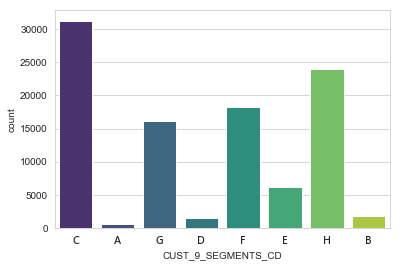

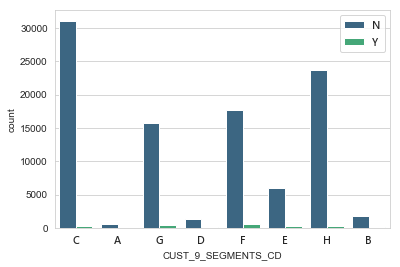

-------------------------------
C:
N    31105
Y      198
Name: Y1, dtype: int64
N(%): 99.36747276618854
Y(%): 0.6325272338114558
-------------------------------
A:
N    622
Y     21
Name: Y1, dtype: int64
N(%): 96.73405909797823
Y(%): 3.265940902021773
-------------------------------
G:
N    15706
Y      454
Name: Y1, dtype: int64
N(%): 97.19059405940594
Y(%): 2.8094059405940595
-------------------------------
D:
N    1376
Y     126
Name: Y1, dtype: int64
N(%): 91.61118508655126
Y(%): 8.388814913448735
-------------------------------
F:
N    17737
Y      586
Name: Y1, dtype: int64
N(%): 96.80183376084702
Y(%): 3.1981662391529766
-------------------------------
E:
N    5973
Y     268
Name: Y1, dtype: int64
N(%): 95.70581637558084
Y(%): 4.294183624419164
-------------------------------
H:
N    23751
Y      272
Name: Y1, dtype: int64
N(%): 98.86775173791783
Y(%): 1.1322482620821712
-------------------------------
B:
N    1730
Y      75
Name: Y1, dtype: int64
N(%): 95.84487534626038
Y(%): 

In [405]:
count_and_percent("CUST_9_SEGMENTS_CD", train, "Y1")

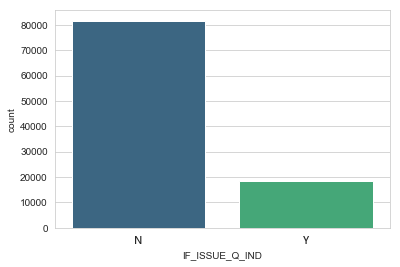

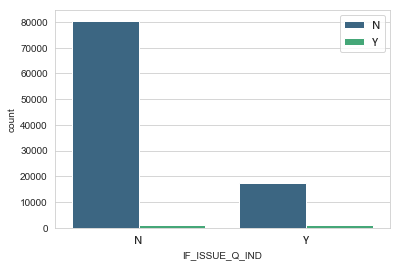

-------------------------------
N:
N    80491
Y     1101
Name: Y1, dtype: int64
N(%): 98.65060300029414
Y(%): 1.3493969997058535
-------------------------------
Y:
N    17509
Y      899
Name: Y1, dtype: int64
N(%): 95.11625380269449
Y(%): 4.883746197305519


In [433]:
count_and_percent("IF_ISSUE_Q_IND", train, "Y1")

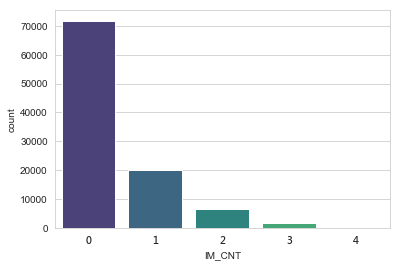

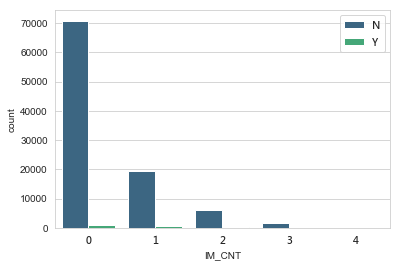

-------------------------------
0:
N    70784
Y      996
Name: Y1, dtype: int64
N(%): 98.61242685984955
Y(%): 1.3875731401504598
-------------------------------
1:
N    19311
Y      653
Name: Y1, dtype: int64
N(%): 96.72911240232418
Y(%): 3.2708875976758165
-------------------------------
2:
N    6167
Y     247
Name: Y1, dtype: int64
N(%): 96.14904895541004
Y(%): 3.850951044589959
-------------------------------
3:
N    1682
Y     100
Name: Y1, dtype: int64
N(%): 94.38832772166106
Y(%): 5.611672278338945
-------------------------------
4:
N    56
Y     4
Name: Y1, dtype: int64
N(%): 93.33333333333333
Y(%): 6.666666666666667


In [438]:
count_and_percent("IM_CNT", train, "Y1")

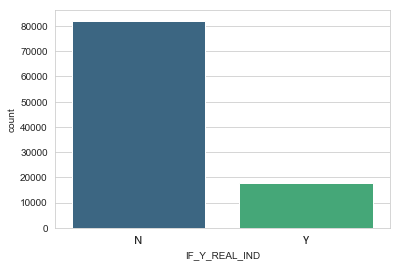

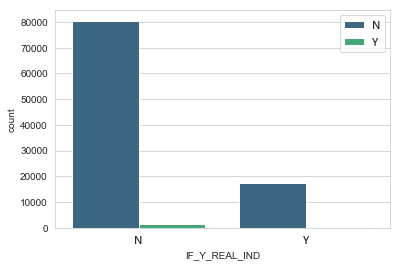

-------------------------------
N:
N    80481
Y     1631
Name: Y1, dtype: int64
N(%): 98.0136886204209
Y(%): 1.9863113795791114
-------------------------------
Y:
N    17519
Y      369
Name: Y1, dtype: int64
N(%): 97.93716457960645
Y(%): 2.0628354203935597


In [440]:
count_and_percent("IF_Y_REAL_IND", train, "Y1")

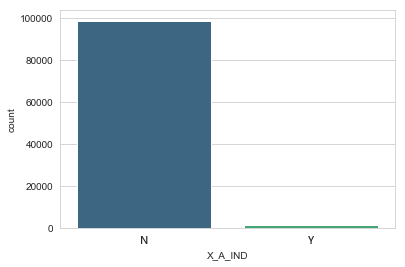

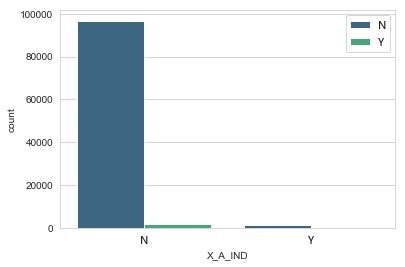

-------------------------------
N:
N    96755
Y     1951
Name: Y1, dtype: int64
N(%): 98.02342309484733
Y(%): 1.9765769051526758
-------------------------------
Y:
N    1208
Y      48
Name: Y1, dtype: int64
N(%): 96.17834394904459
Y(%): 3.821656050955414
-------------------------------
nan:
N    37
Y     1
Name: Y1, dtype: int64
N(%): 97.36842105263158
Y(%): 2.631578947368421


In [441]:
count_and_percent("X_A_IND", train, "Y1")

# (17)連續數值(或數值資料)觀察

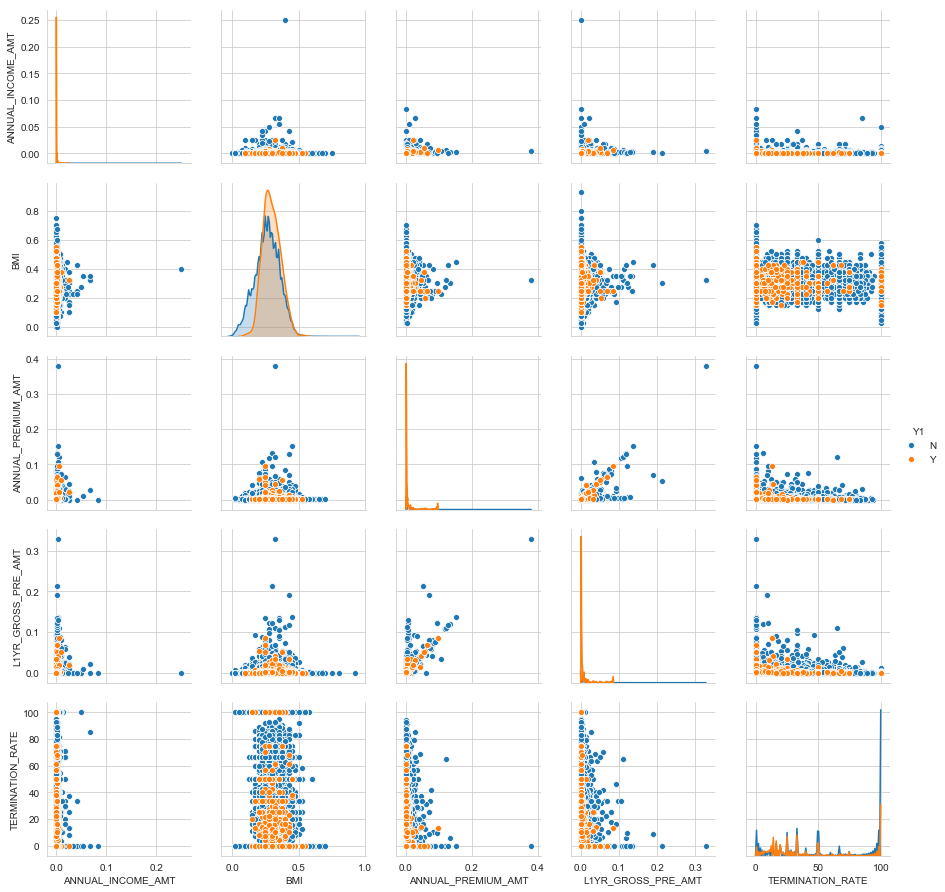

In [451]:
# 純連續數值
sns.pairplot(train[["ANNUAL_INCOME_AMT", "BMI", "ANNUAL_PREMIUM_AMT", "L1YR_GROSS_PRE_AMT", "TERMINATION_RATE", "Y1"]], 
            hue="Y1")

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


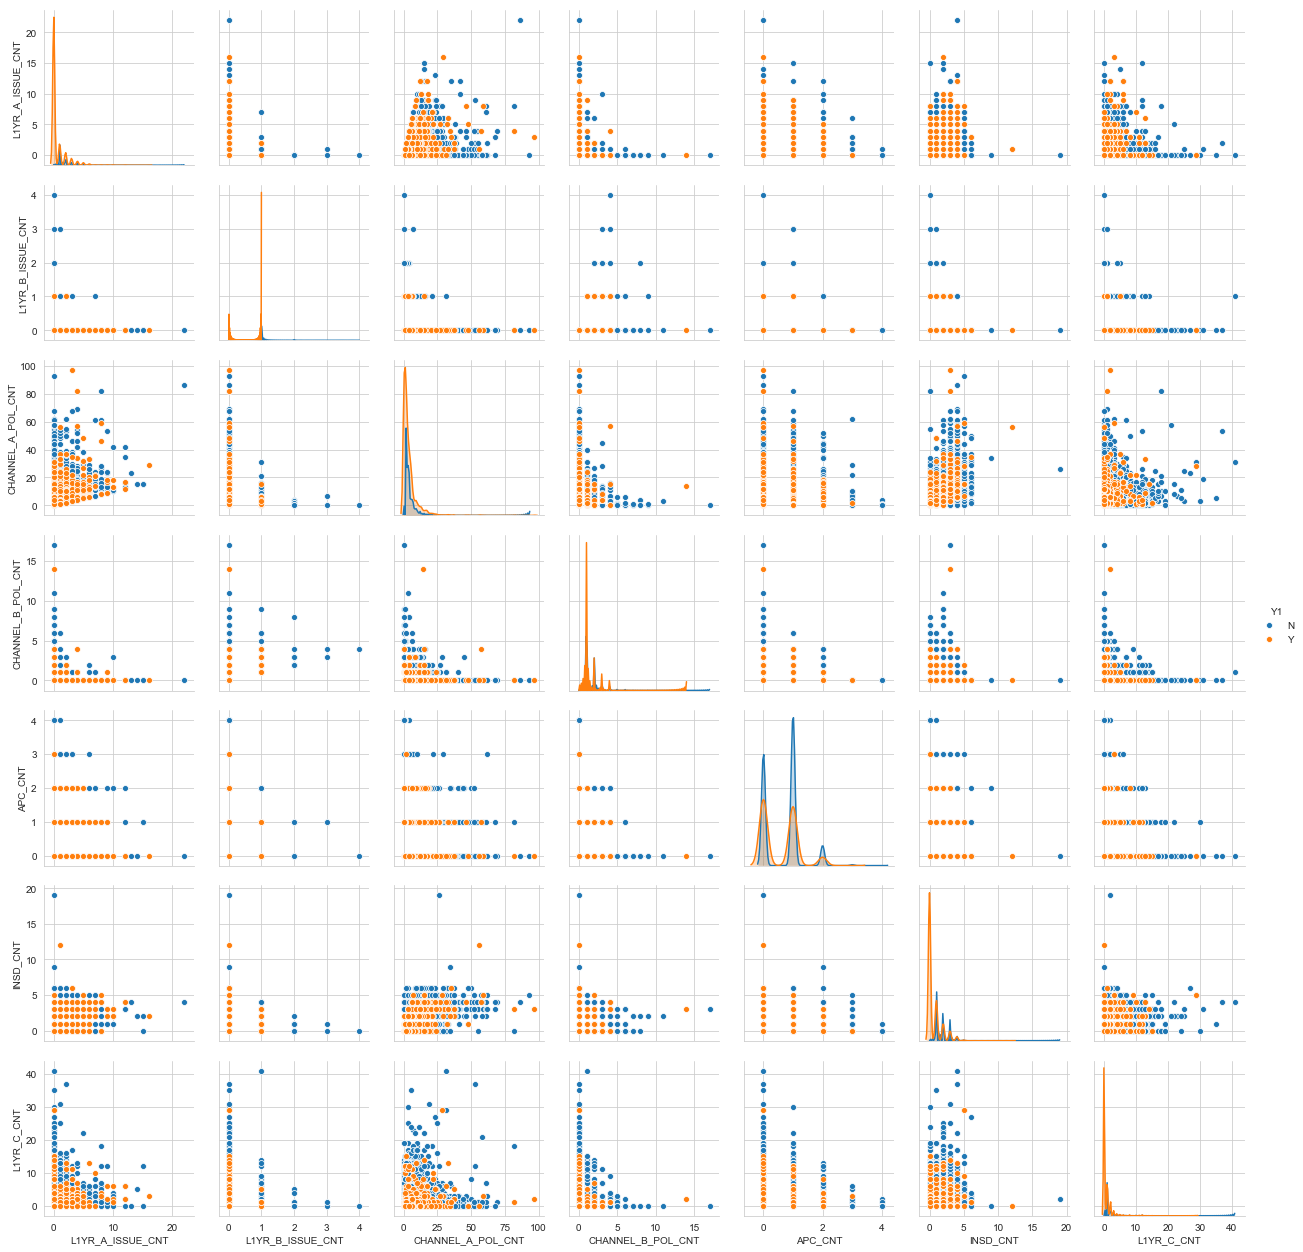

In [458]:
sns.pairplot(train[["L1YR_A_ISSUE_CNT", "L1YR_B_ISSUE_CNT", "CHANNEL_A_POL_CNT", "CHANNEL_B_POL_CNT"
                    , "APC_CNT", "INSD_CNT", "L1YR_C_CNT","Y1"]], hue="Y1")

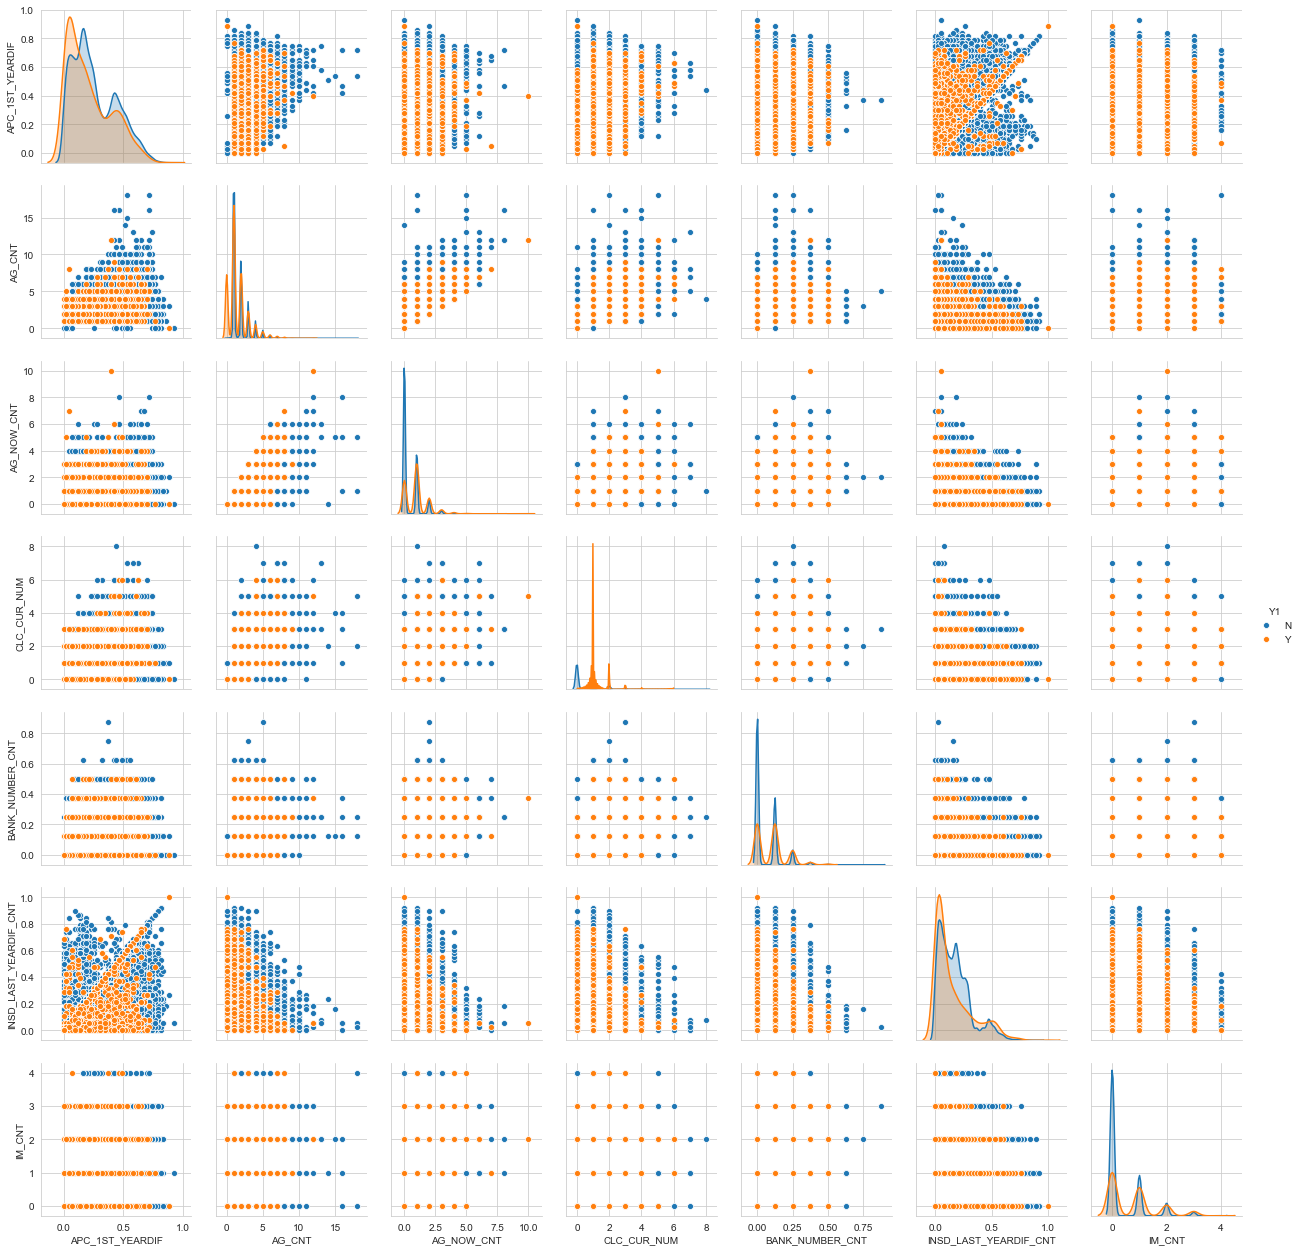

In [460]:
sns.pairplot(train[["APC_1ST_YEARDIF", "AG_CNT", "AG_NOW_CNT", "CLC_CUR_NUM", "BANK_NUMBER_CNT", 
       "INSD_LAST_YEARDIF_CNT", "IM_CNT", "Y1"]], hue="Y1")

# Clean missing value test based on EDA

### (1)BMI clean:
(a) [0.2, 0.3]區間取平均數，先觀察BMI值得規律，若平均數為不合理數，則找合理最接近平均數的數

(b) 用全部BMI值得平均數，先觀察BMI值得規律，若平均數為不合理數，則找合理最接近平均數的數

(c) 用除BMI其他欄位

### (2)GENDER clean:
(a) 使用OCCUPATION_CLASS_CD去填補GENDER欄位遺失值。規則為:如果職業類別是1則為Female；其他(含NaN)則為Male。
* 發想來源:觀察不同OCCUPATION_CLASS_CD對於Female、Male之比例

In [ ]:
# use OCCUPATION_CLASS_CD to fill gender
def gender_clean(cols):
    
    gender = cols[0]
    occ = cols[1]
    
    
    # if gender is null
    if pd.isnull(gender):
        
        # if occupation is 1
        if occ == 1:
            return "F"
            
        else:
            return "M"
        
    else:
        return gender



In [ ]:
train["GENDER"] = train[["GENDER", "OCCUPATION_CLASS_CD"]].apply(gender_clean, axis=1)

In [ ]:
# Check
count_and_percent("GENDER", train, "Y1")